## Спортивный анализ данных. Платформа Kaggle

### Домашнее задание 1:
* Задание 1: Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;
* Задание 2: Сделать базовый анализ целевой переменной, сделать выводы;
* Задание 3: Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;
* Задание 4: Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;
* Задание 5: Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?
* Задание 6: Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.
* Задание 7: Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

Ссылка на наборы данных: https://drive.google.com/file/d/1j8zuKbI-PW5qKwhybP4S0EtugbPqmeyX/view?usp=sharing

In [1]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = 'C:/Users/ASER/Desktop/GeekBrains/Kaggle/Lesson_1/data_HW1/'

### Задание 1.
Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы

### 1. Размерность датасетов

In [4]:
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')

print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.head(2)

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


### 2. Базовые статистики 

In [5]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


#### Выводы:
* Целевая переменная принимает значения 0 или 1. Выборка несбалансированна - только 10% выборки приходится на 1 и 90% - на 0.
* Выборка содержит много выбросов

In [6]:
TARGET_NAME = 'target'
INDEPENDENT_VARIABLE_NAMES = train.columns[2:].to_list()

Выделяем количественные и категориальные признаки:

In [7]:
NUMERICAL_FEATURE_NAMES = train[INDEPENDENT_VARIABLE_NAMES].select_dtypes(include=[np.number]).columns.to_list()
numeric = len(NUMERICAL_FEATURE_NAMES)
categorial = len(INDEPENDENT_VARIABLE_NAMES) - numeric
print(f'count of numeric features {numeric}')
print(f'count of categorial features {categorial}')

count of numeric features 200
count of categorial features 0


__Вывод:__ категориальных признаков нет, все признаки количественные

Количественные признаки разделяем на дискретные и непрерывные:

In [8]:
DISCRETE_FEATURE_NAMES = [feature for feature in NUMERICAL_FEATURE_NAMES
                          if len(train[feature].unique()) < 25]
discrete = len(DISCRETE_FEATURE_NAMES)
continuous = len(NUMERICAL_FEATURE_NAMES) - discrete
print(f'count of discrete features {discrete}')
print(f'count of continuous features {continuous}')

count of discrete features 0
count of continuous features 200


__Вывод:__ дескретных признаков нет, все признаки непрерывные.

In [9]:
CONTINUOUS_FEATURE_NAMES = NUMERICAL_FEATURE_NAMES

#### Skewness

In [10]:
skew = st.skew(train[NUMERICAL_FEATURE_NAMES])
positive_skew = skew[skew > 0]
negative_skew = skew[skew < 0]

In [11]:
pd.DataFrame(positive_skew).describe()

,0
count,112.000000
mean,0.085579
std,0.062290
min,0.000853
25%,0.039544
50%,0.072228
75%,0.124186
max,0.267412


In [12]:
pd.DataFrame(negative_skew).describe()

,0
count,88.000000
mean,-0.081180
std,0.066786
min,-0.340170
25%,-0.117573
50%,-0.067329
75%,-0.029651
max,-0.000097


__Вывод:__ 112 признаков в выборке имеют положительную асимметрию, 88 - отрицательную. Приблизительно 50% выборки имеет асимметрию в ту или иную сторону выше 0.12. Экстремальные значения негативной асимметрии выше, чем позитивной.

#### Kurtosis

In [13]:
kurt = st.kurtosis(train[CONTINUOUS_FEATURE_NAMES])
pd.DataFrame(kurt).describe()

,0
count,200.000000
mean,-0.498012
std,0.165428
min,-0.811812
25%,-0.633441
50%,-0.505320
75%,-0.350861
max,-0.013994


__Вывод:__ Excess kurtosis всех признаков отрицательный, среднее значение -0.5. Распределение, более сглаженное по сравнению с нормальным  - плосковершинное (platykurtic).

В целом, распределение далеко от нормального. Можно рассмотреть Box-Cox преобразование, логорифмирование. 

### 3. Пропуски

In [14]:
(len(train) - train.count()).sum()

0

In [15]:
(len(test) - test.count()).sum()

0

__Вывод:__ Пропусков в данных нет.

### 4. Выбросы

In [16]:
info = train.describe()

Выбросы слева, масштабированные по среднему квадратическому отклонению и отсортированные в порядке убывания отклонения:

In [17]:
outliers_left = (info.loc['25%', 'var_0':] - 3 * info.loc['std', 'var_0':] \
                 - info.loc['min', 'var_0':]) / info.loc['std', 'var_0':]

outliers = pd.DataFrame(outliers_left, columns=['std_fraction'])

outliers_min = outliers[outliers.std_fraction > 0].sort_values(by=['std_fraction'], ascending=False)
outliers_min[:10]

,std_fraction
var_149,0.780895
var_52,0.742103
var_28,0.705159
var_67,0.570548
var_124,0.437345
var_105,0.417444
var_17,0.412081
var_167,0.376036
var_106,0.345773
var_171,0.302142


Выбросы справа, масштабированные по среднему квадратическому отклонению и отсортированные в порядке убывания отклонения:

In [18]:
outliers_right = (info.loc['max', 'var_0':]\
                  - (info.loc['75%', 'var_0':] + 3 * info.loc['std', 'var_0':])) /\
                  info.loc['std', 'var_0':]
outliers = pd.DataFrame(outliers_right, columns=['std_fraction'])
outliers_max = outliers[outliers.values > 0].sort_values(by=['std_fraction'], ascending=False)
outliers_max[:10]

,std_fraction
var_31,0.836722
var_38,0.791761
var_192,0.688322
var_44,0.575900
var_149,0.441051
var_28,0.438617
var_120,0.376518
var_58,0.322002
var_186,0.306017
var_146,0.304669


Признаки, содержащие большие выбросы с двух сторон:

In [19]:
set(outliers_min[:10].index) & set(outliers_max[:10].index)

{'var_149', 'var_28'}

In [20]:
features_with_outliers = list((set(outliers_min.index) | set(outliers_max.index)))
outliers_from_both_sides = list((set(outliers_min.index) & set(outliers_max.index)))
len(features_with_outliers), len(outliers_from_both_sides)

(56, 17)

__Вывод:__ Выбросы присутствуют у 56 признаков из 200. У 17 признаков выбросы присутствуют с обеих сторон.

### Задание 2: 
* Сделать базовый анализ целевой переменной, сделать выводы;

### Анализ распределения целевой переменной

In [21]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

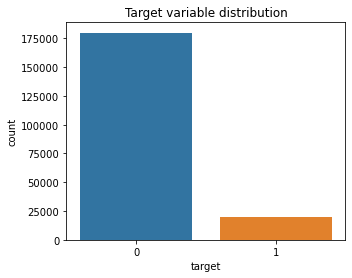

In [22]:
plt.figure(figsize=(5, 4))

sns.countplot(x='target', data=train)

plt.title('Target variable distribution')
plt.show()

__Вывод:__ целевая переменная принимает значения 0 или 1. Выборка несбалансированна - только 10% выборки приходится на 1 и 90% - на 0.

### Задание 3.
* Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы.

In [23]:
def var_target_plot(group):    
    fig, axes = plt.subplots(5, 4, figsize=(20, 20))
    for num, var_name in enumerate(group):    
        var_target_0 = train.loc[train[TARGET_NAME] == 0, var_name]
        var_target_1 = train.loc[train[TARGET_NAME] == 1, var_name]    

        t1 = min(train[var_name])
        t2 = max(train[var_name])

        bins = np.linspace(t1, t2, 20)
        axes[num//4, num%4].hist(var_target_0, bins, density=True, alpha=0.5, label='No default')
        axes[num//4, num%4].hist(var_target_1, bins, density=True, alpha=0.5, label='Default')
        axes[num//4, num%4].set_title(var_name, fontsize=14)
    plt.show()

In [24]:
def plot_train_test_distributions(group): 
    fig, axes = plt.subplots(5, 4, figsize=(20, 20))

    for num, feature in enumerate(group):
        try:
            train_data, test_data = train[feature].copy(), test[feature].copy()
            sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
            sns.kdeplot(test_data, ax=axes[num//4, num%4], color="green", label="test")
        except RuntimeError:
            pass
        except KeyError:
            train_data = train[feature].copy()
            sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
        axes[num//4, num%4].set_title(feature, fontsize=14)

#### Распределение признаков в зависимости от значения целевой переменной 

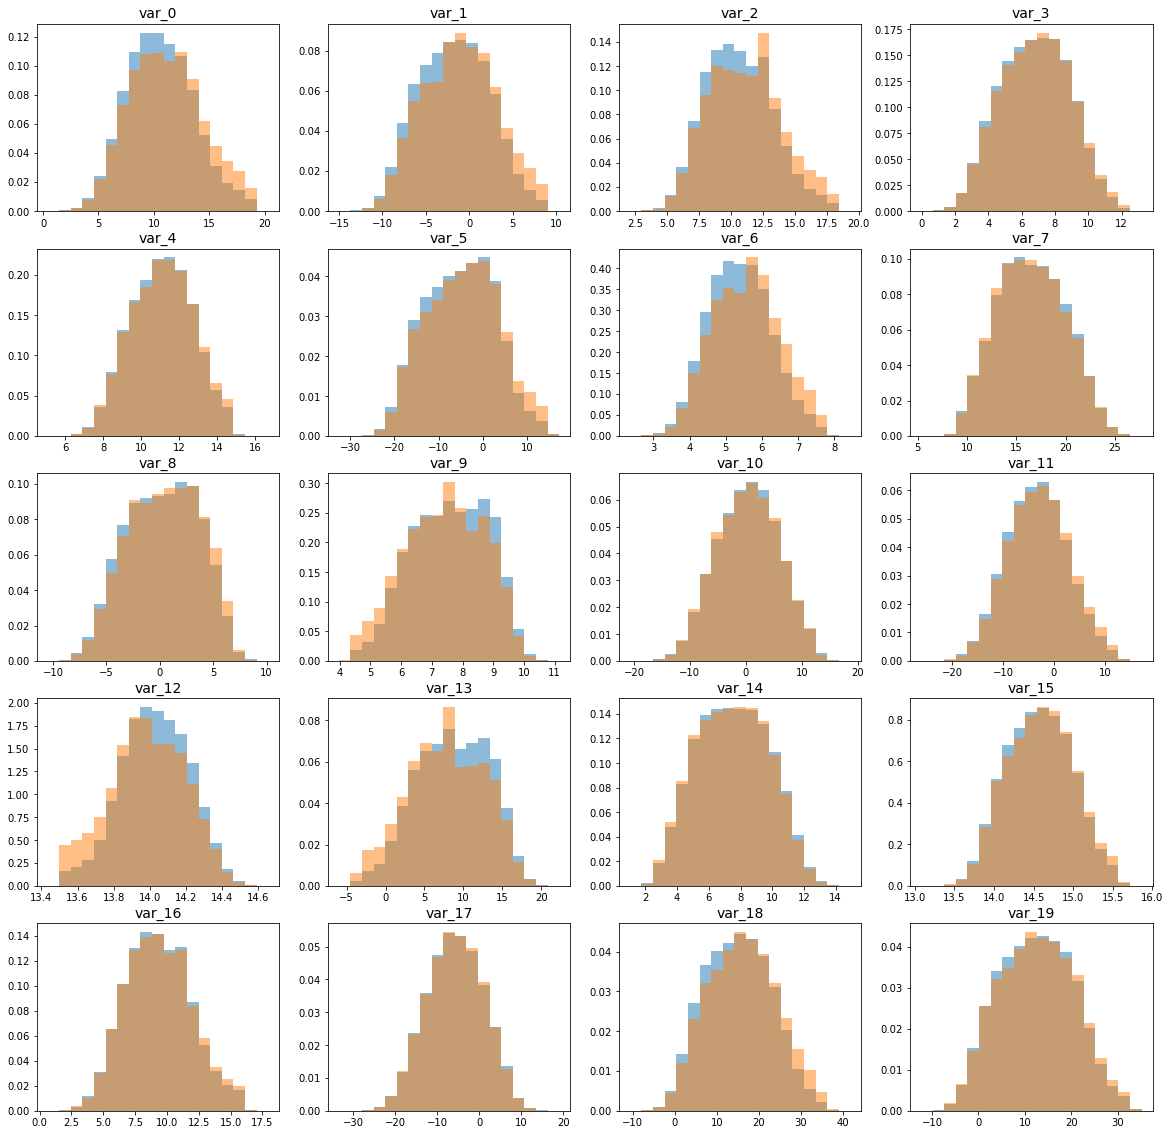

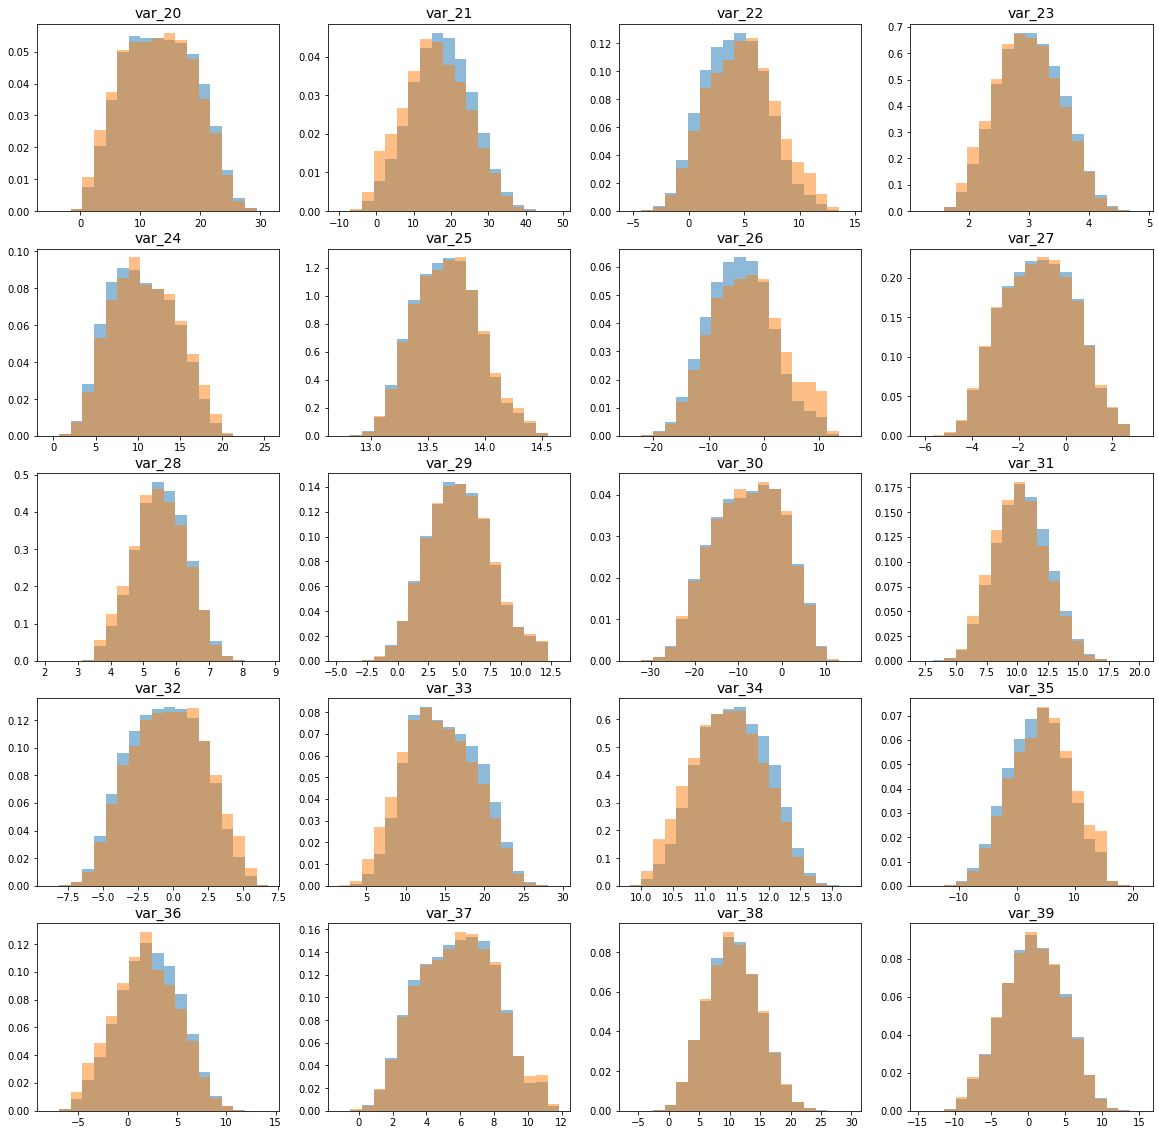

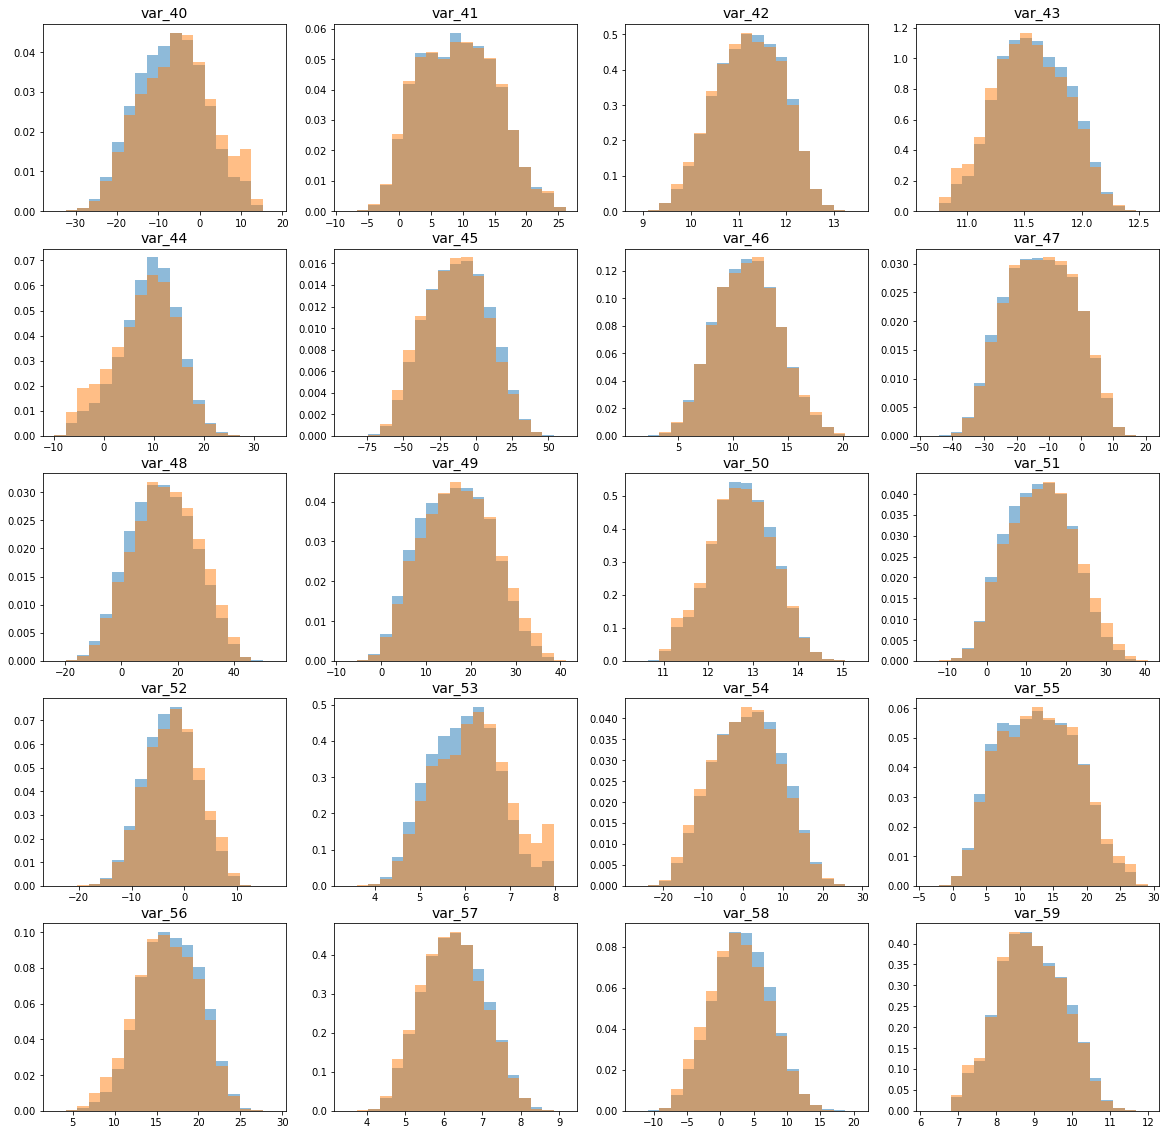

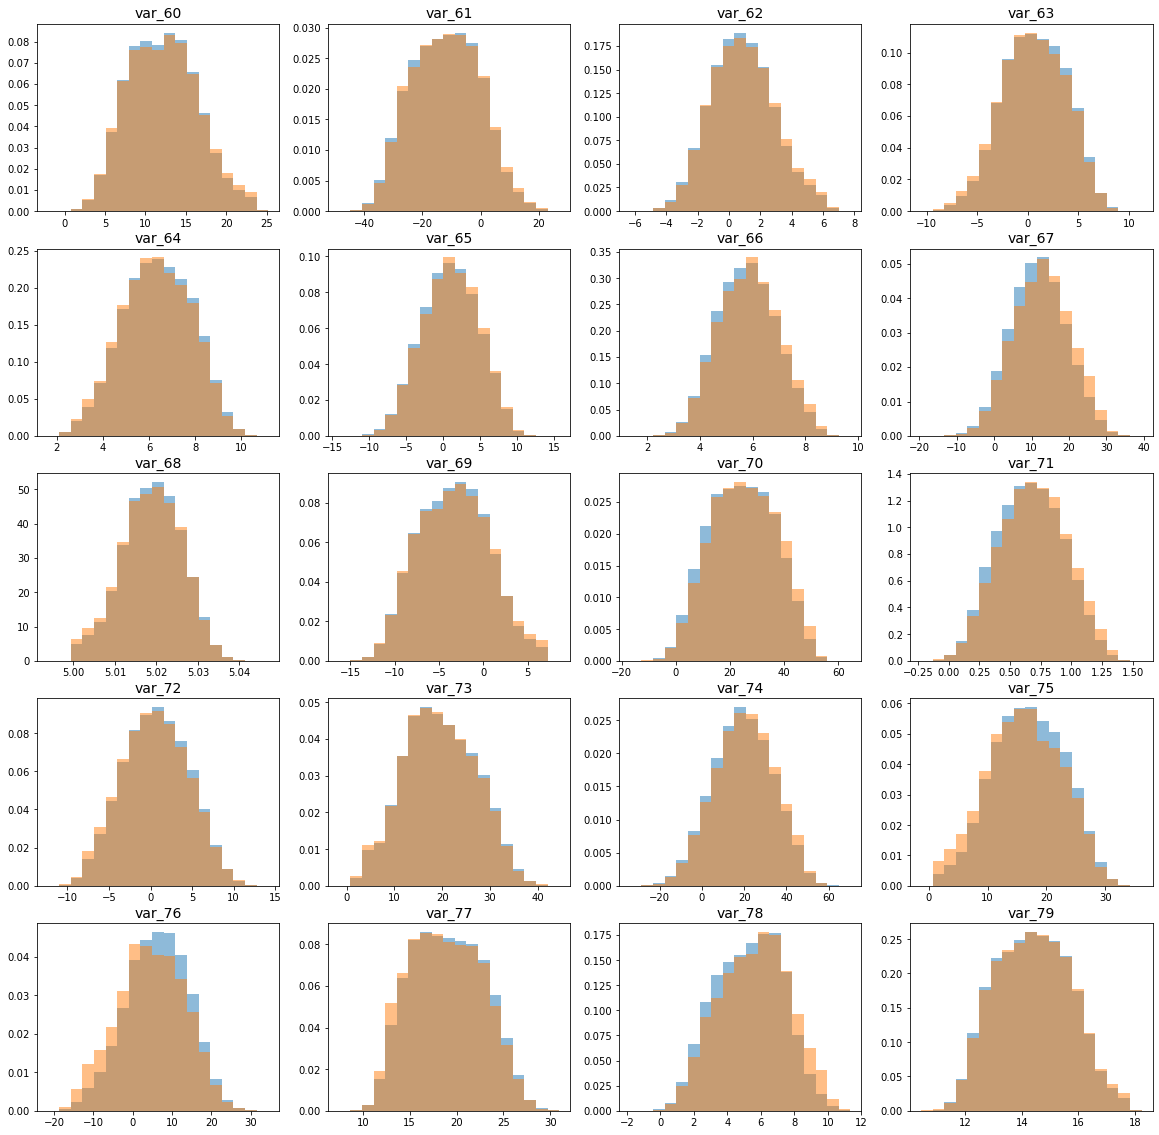

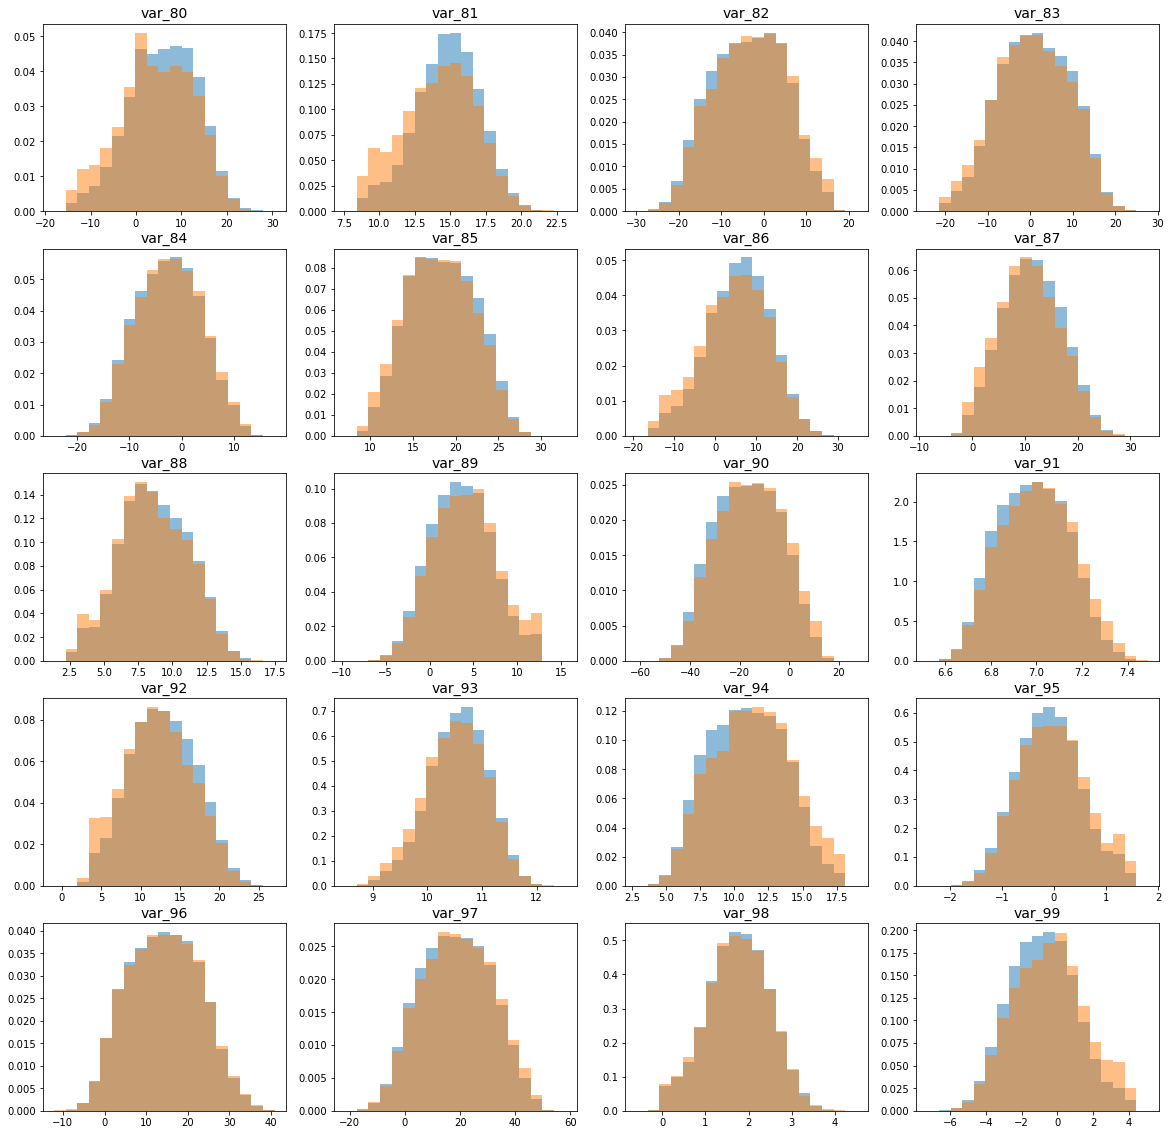

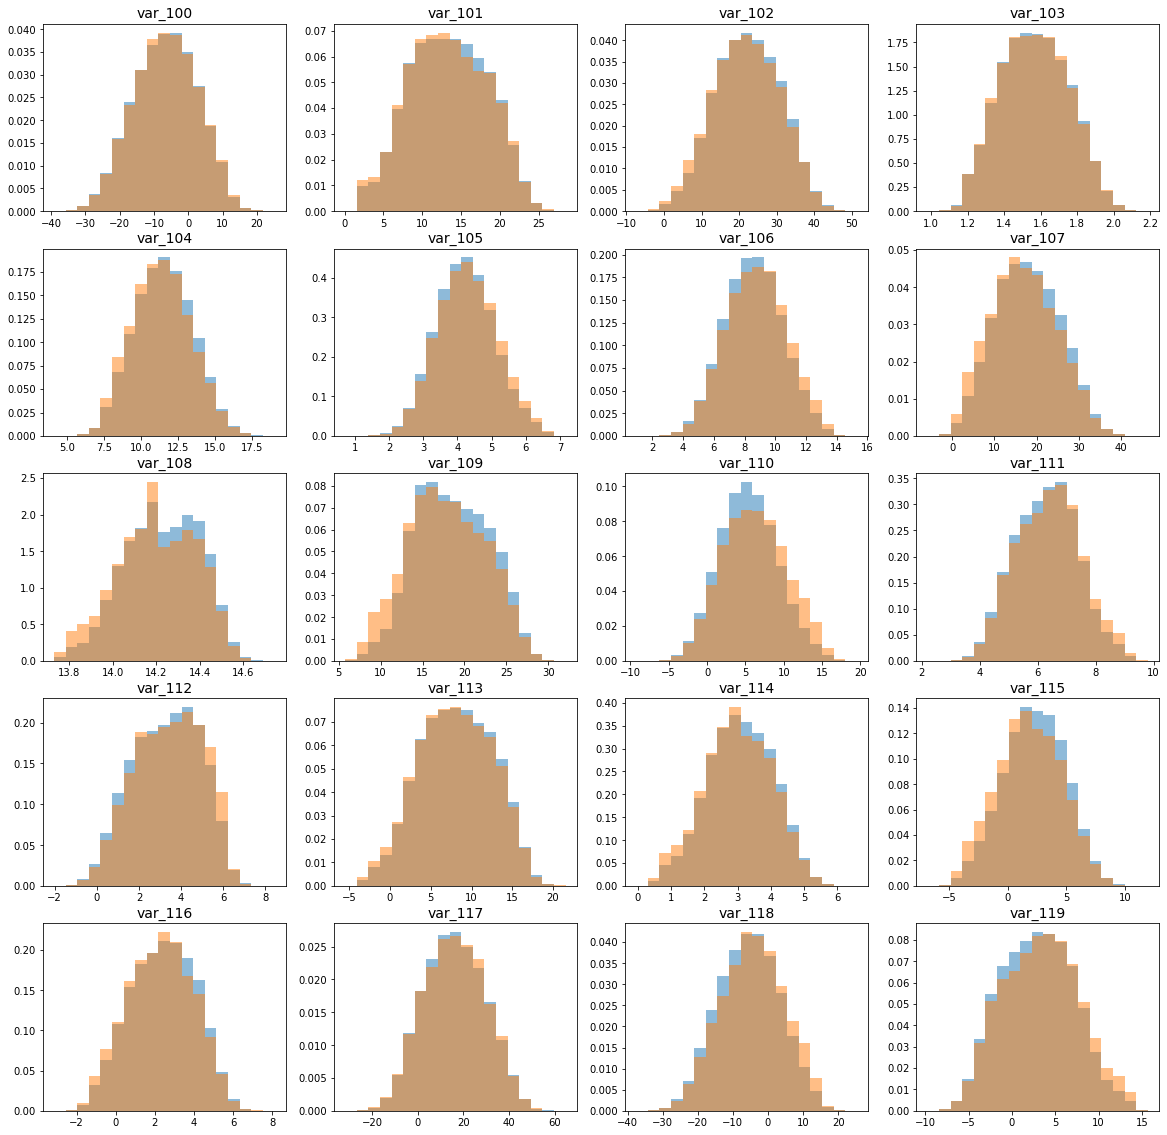

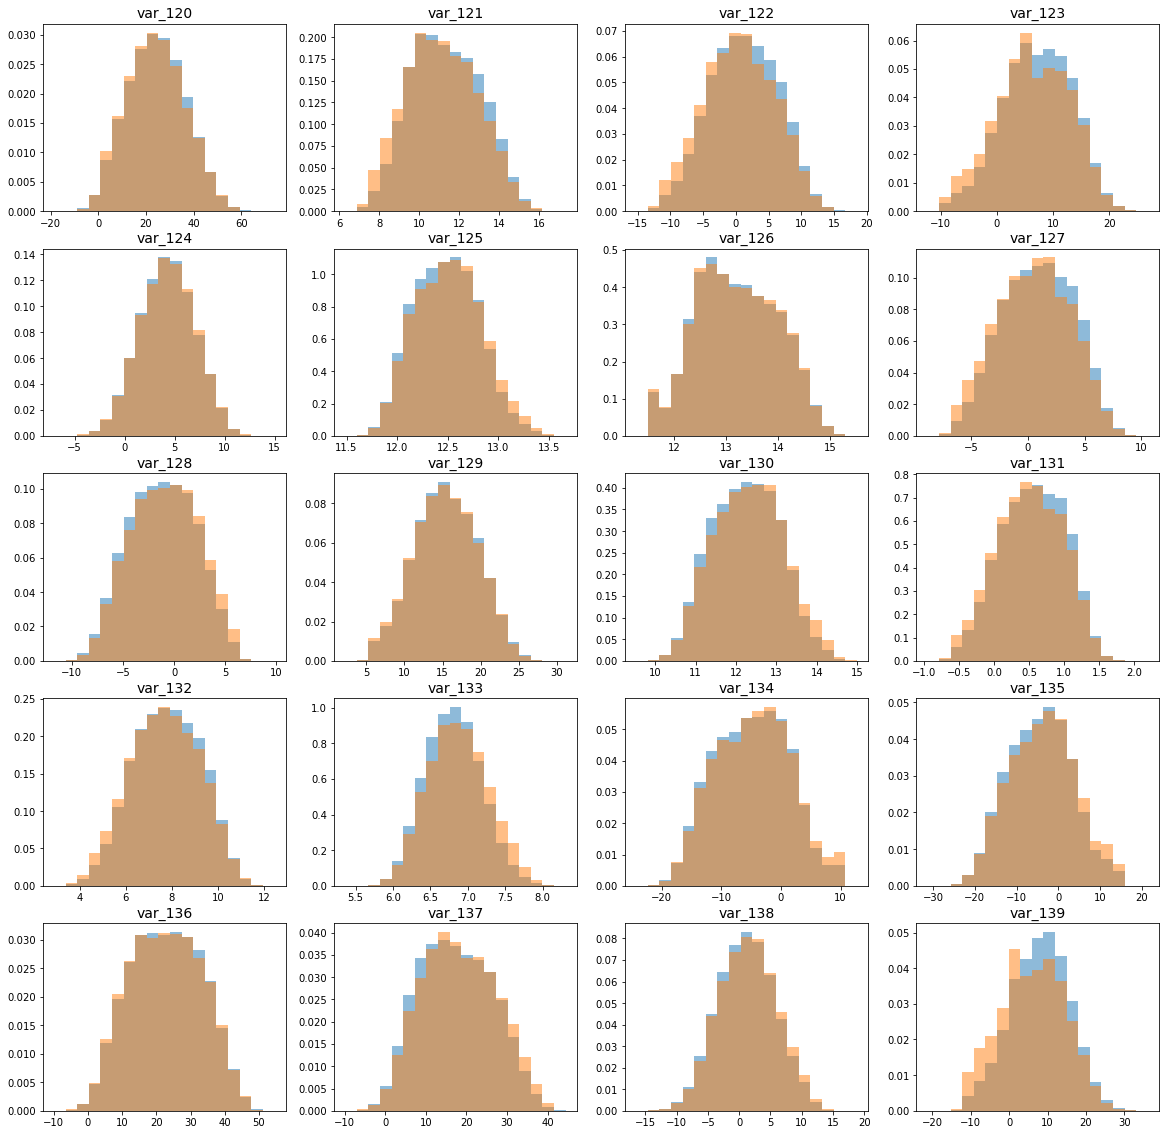

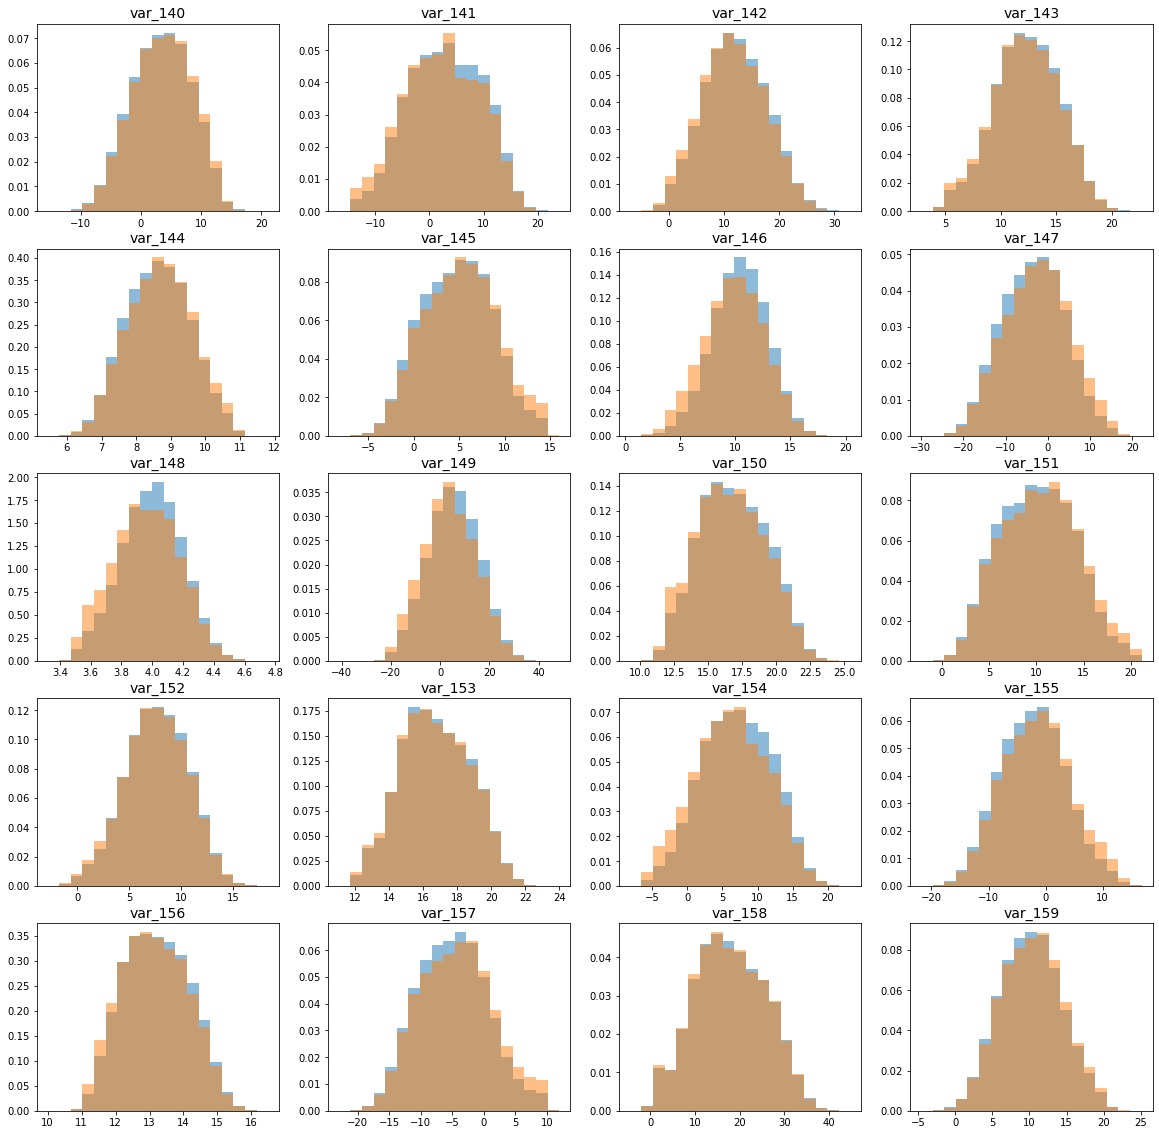

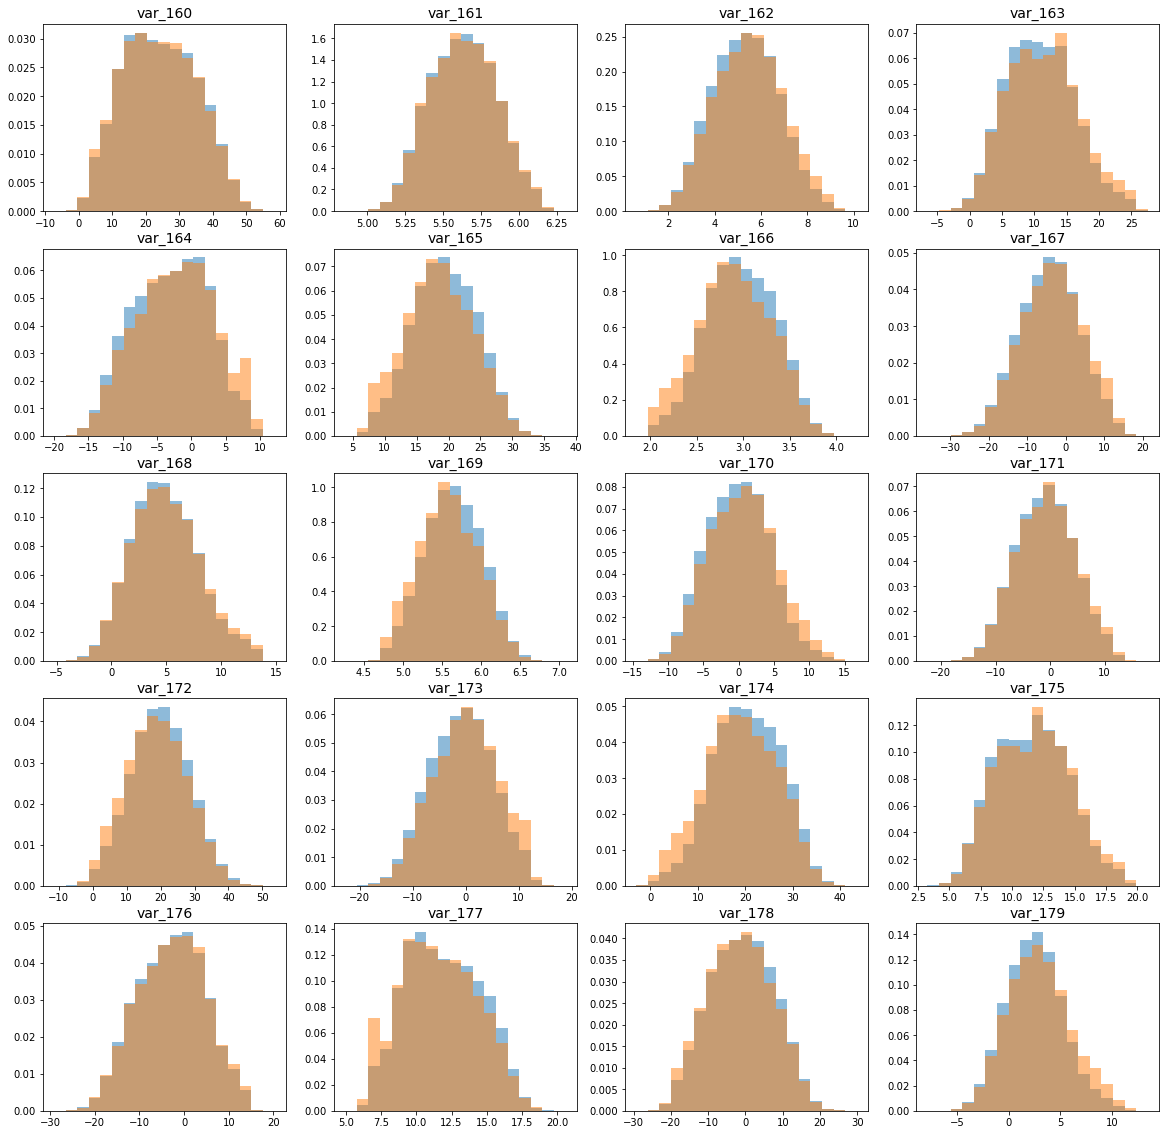

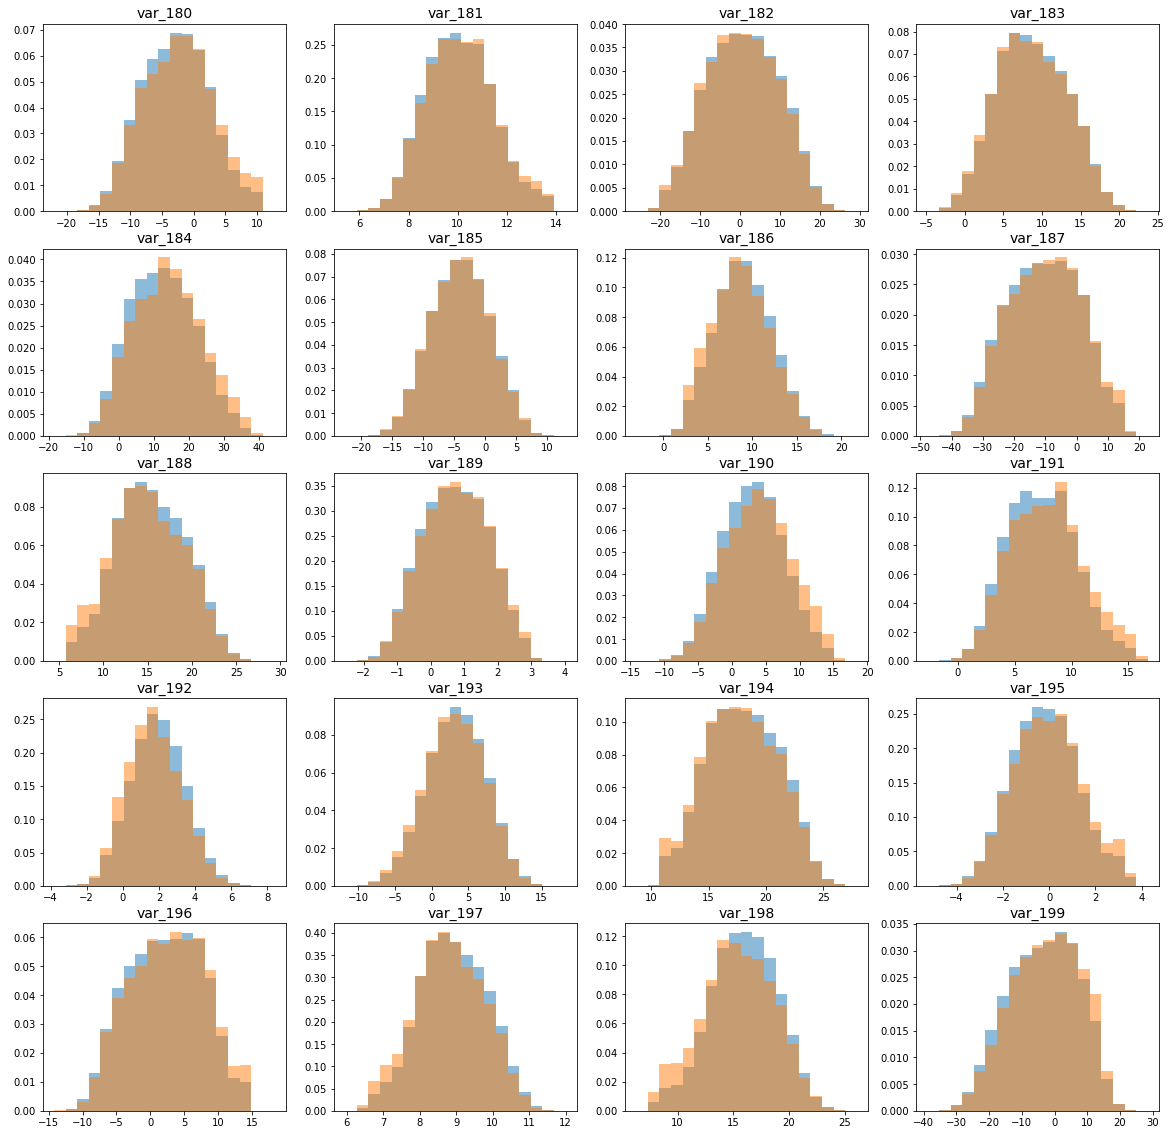

In [25]:
for i in range(10):
    group = CONTINUOUS_FEATURE_NAMES[i * 20 : (i + 1) * 20]
    var_target_plot(group)

#### Распределение признаков для обучающей и тестовой выборки

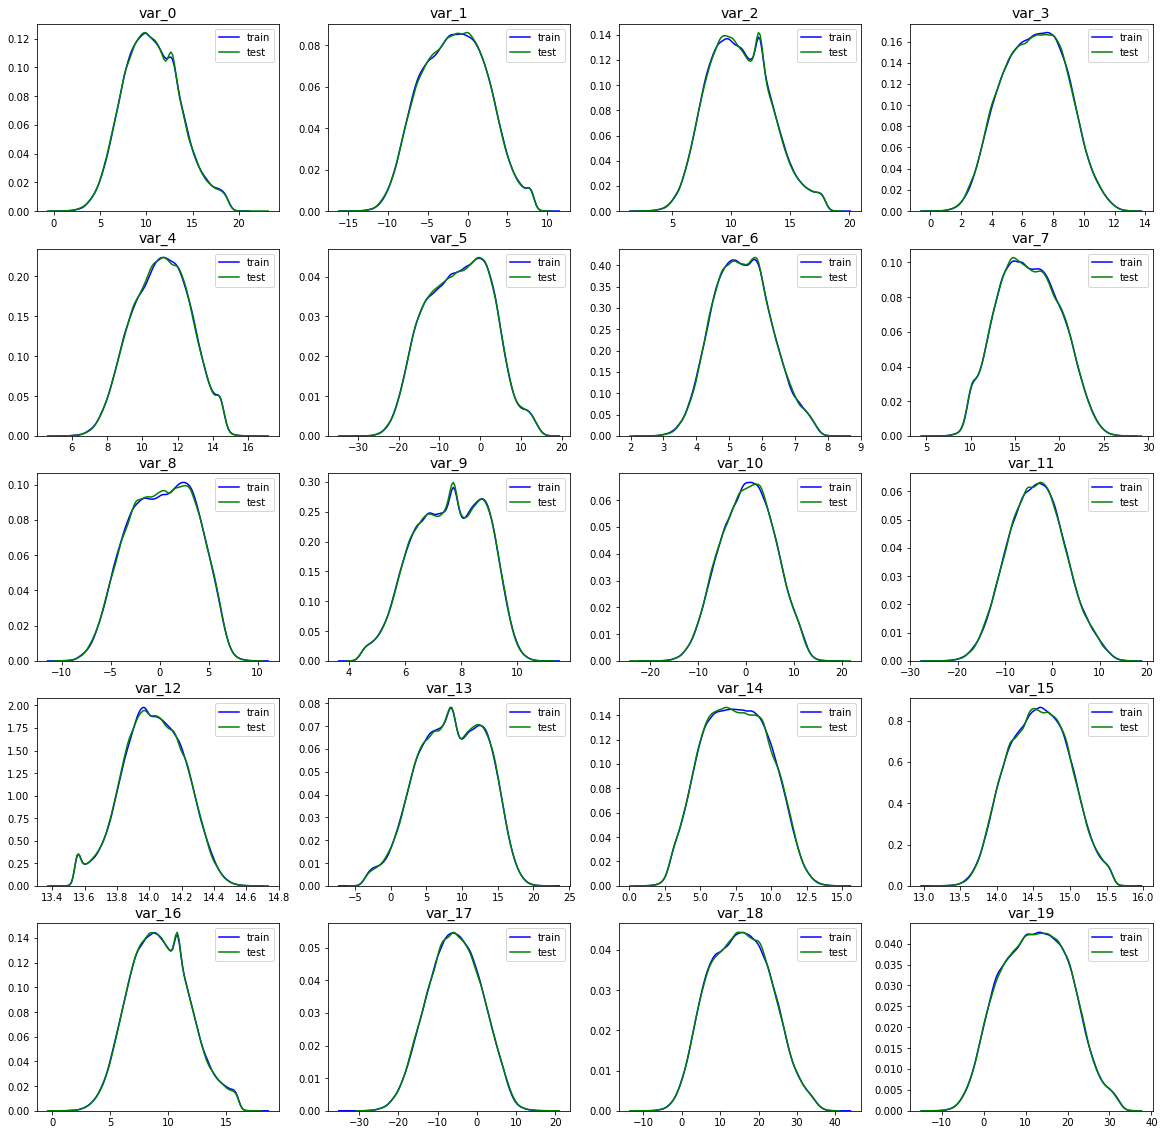

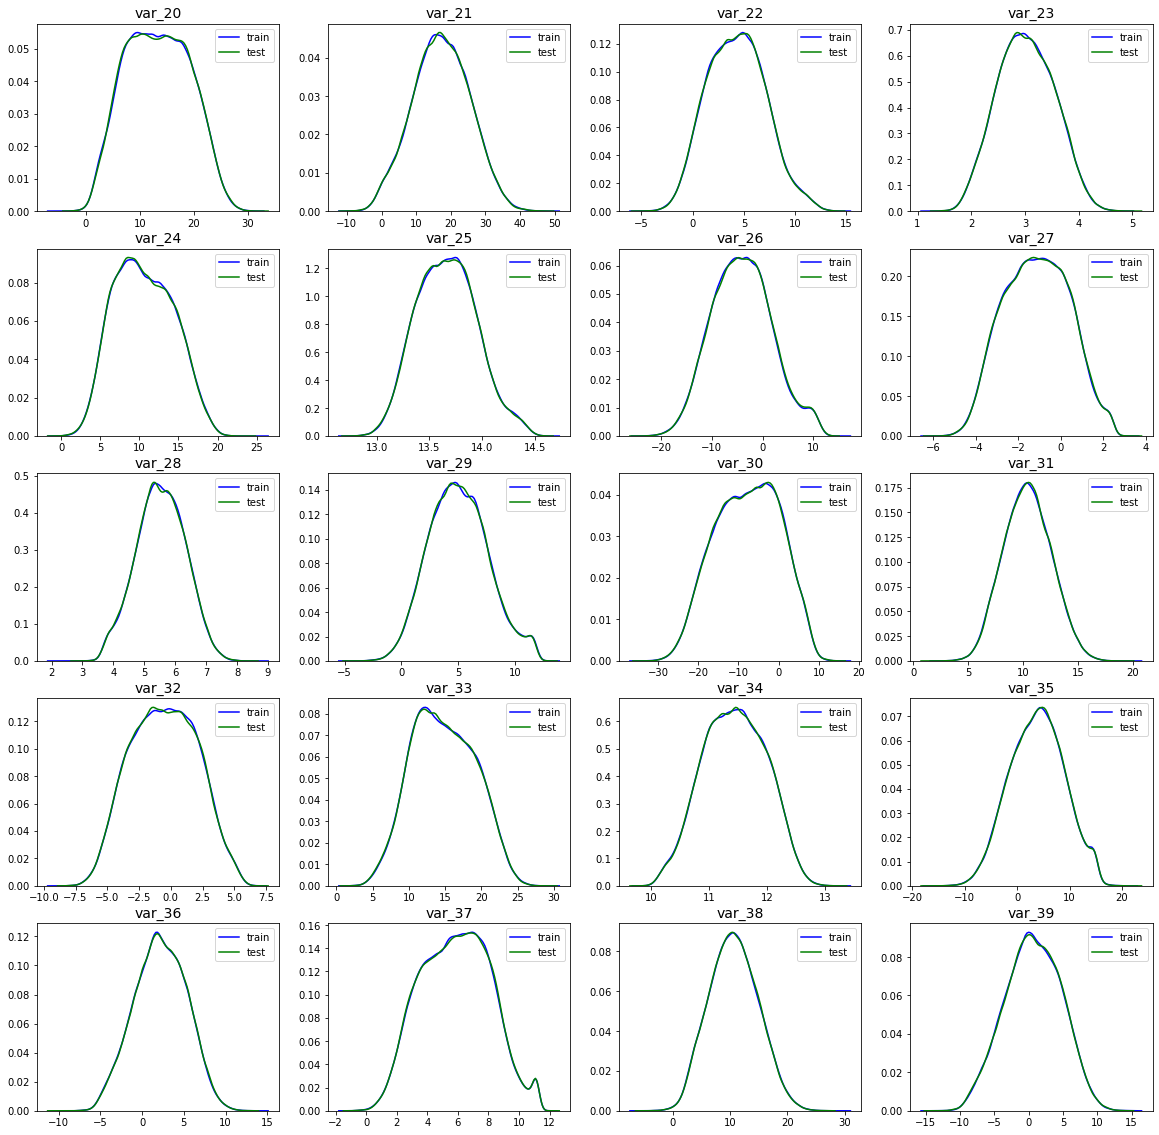

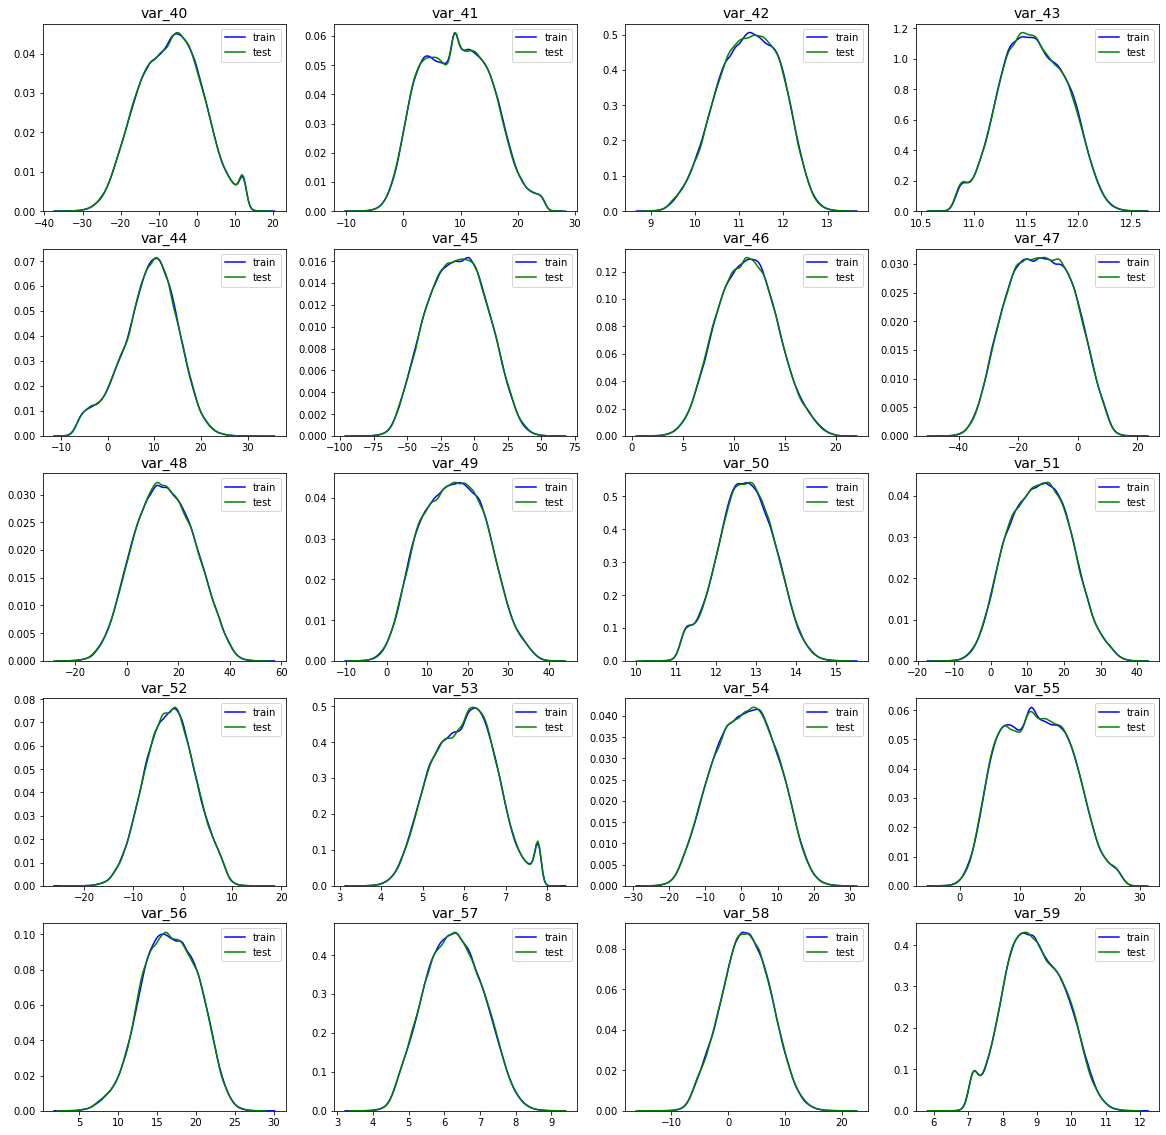

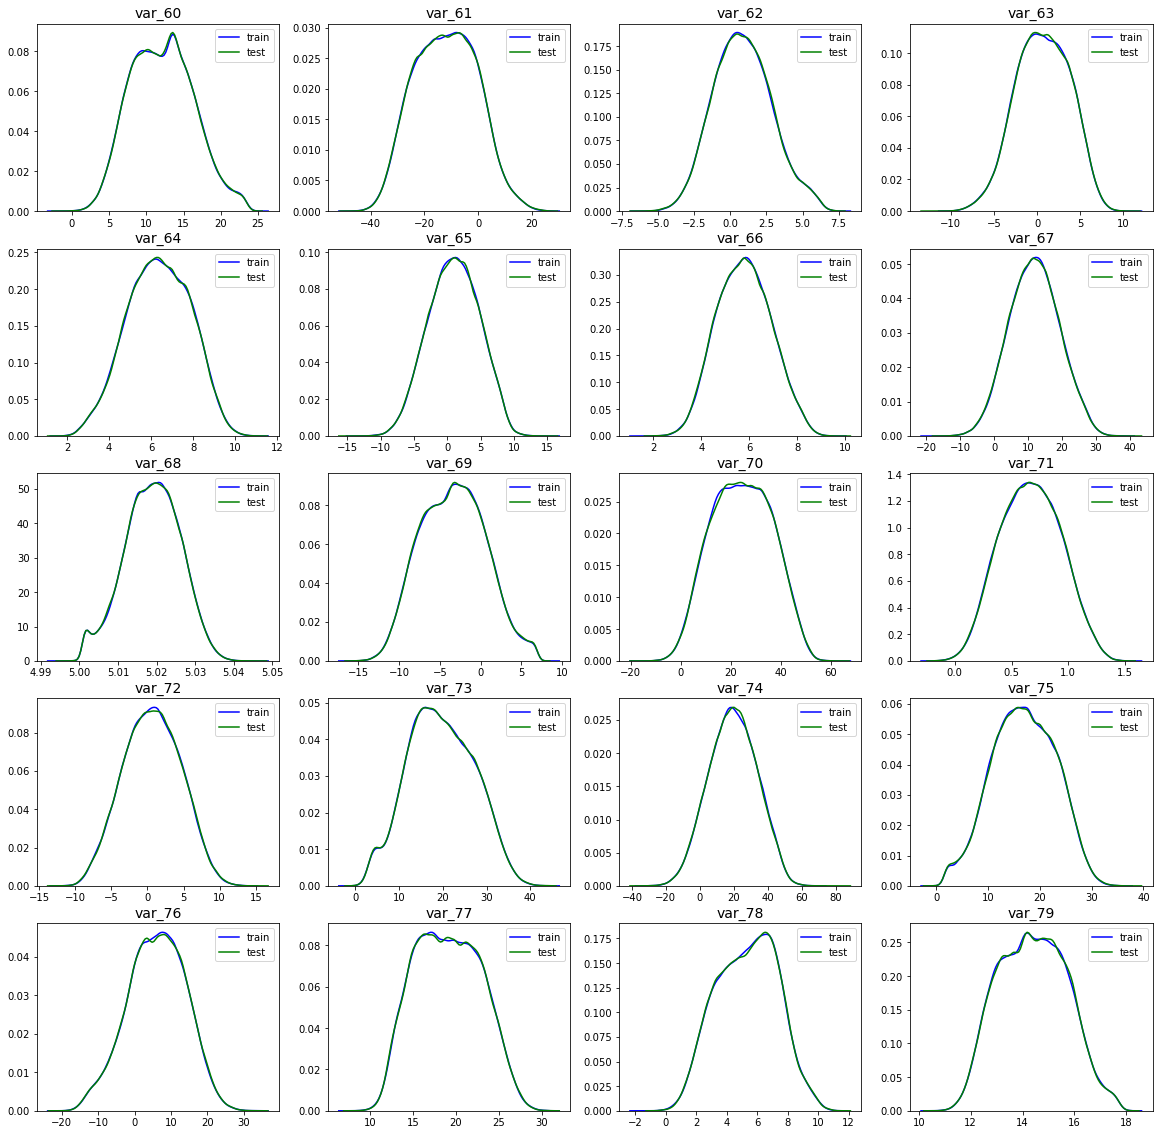

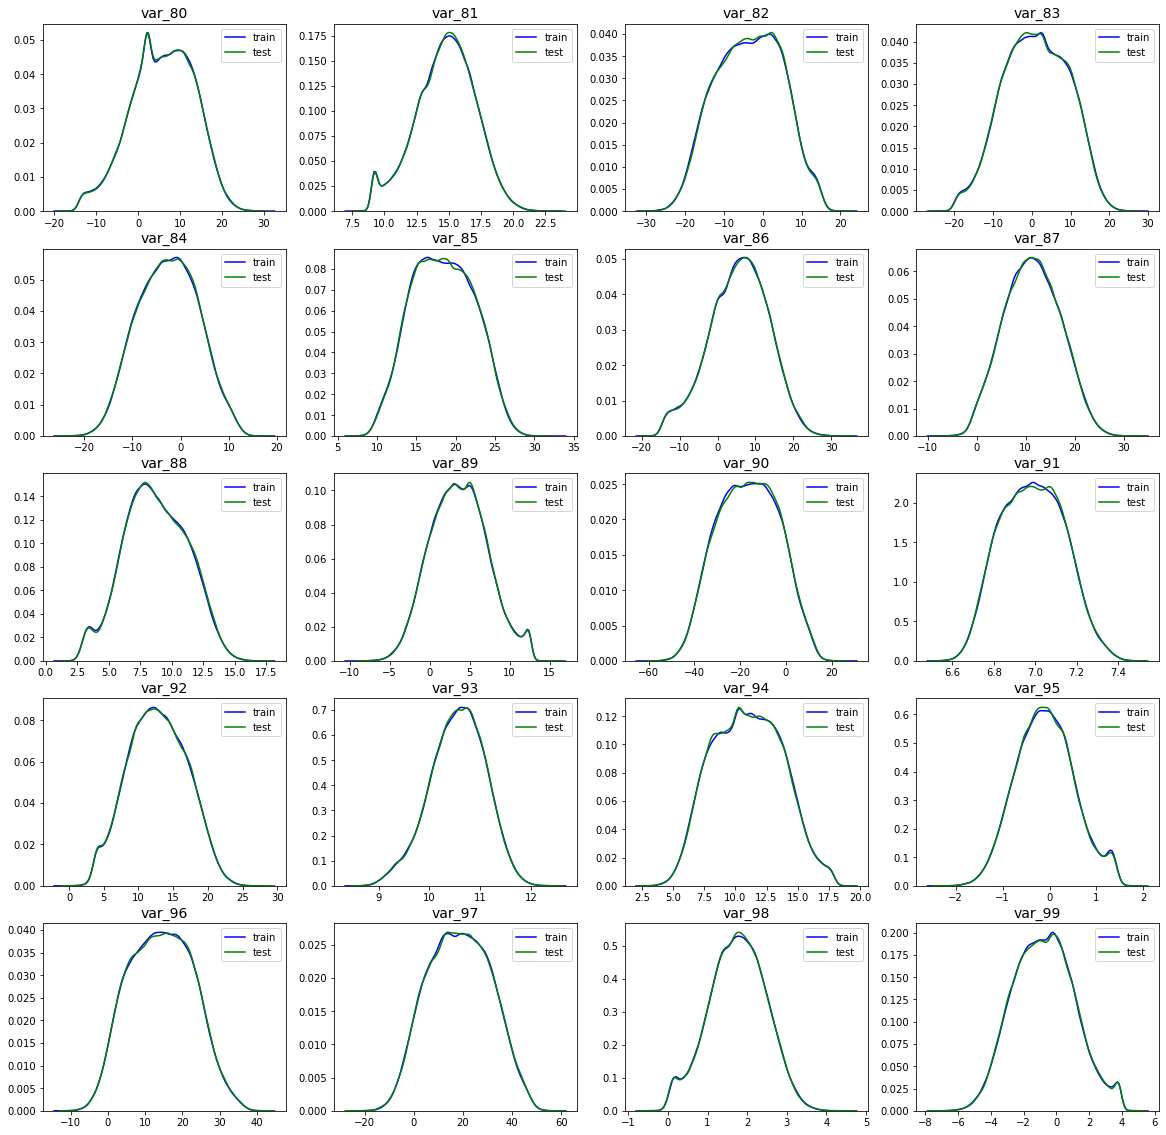

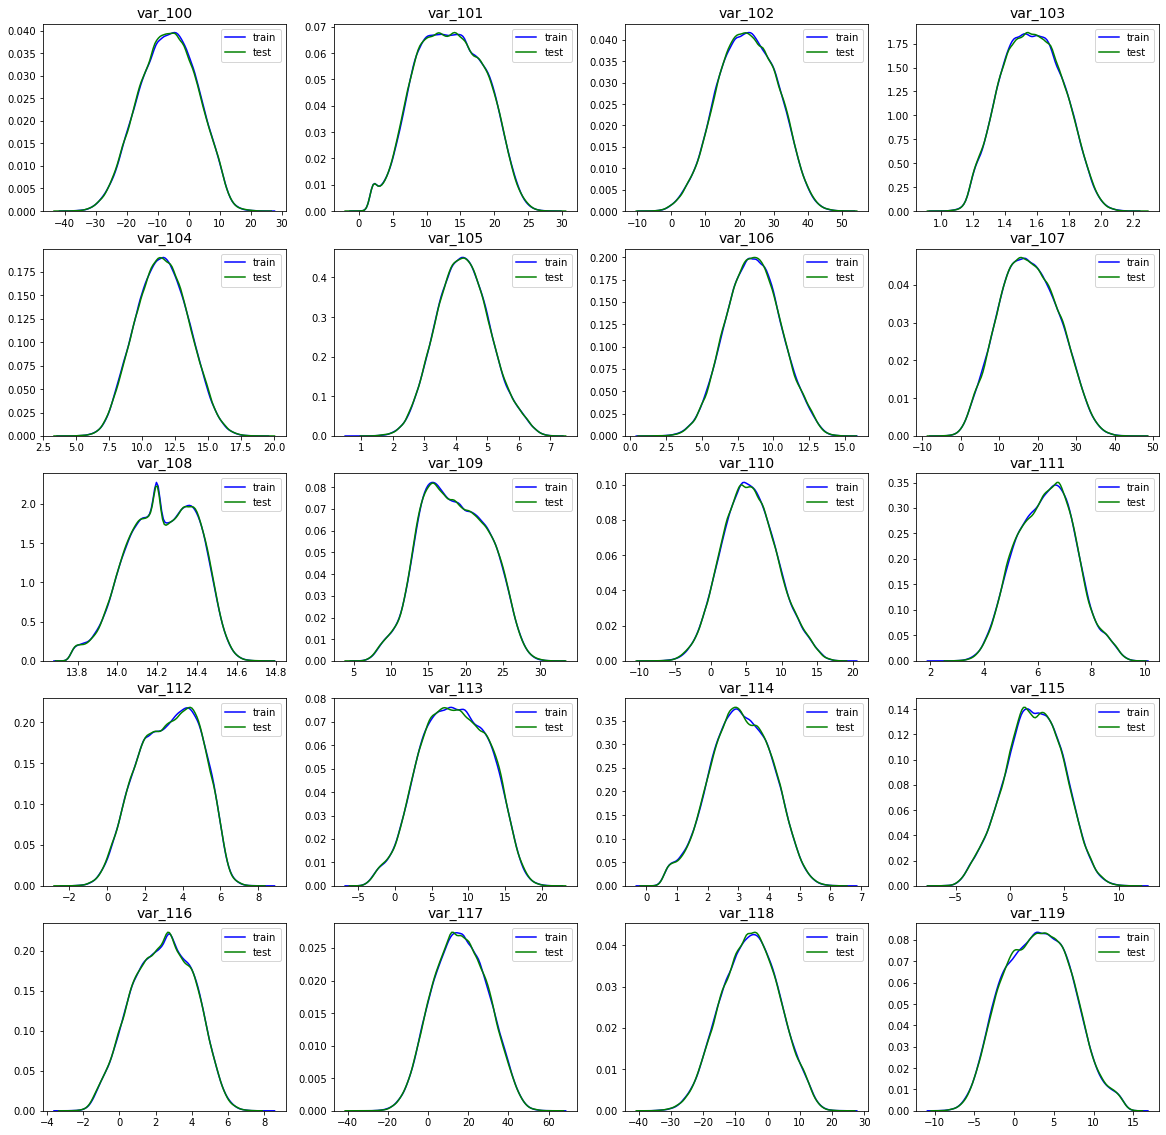

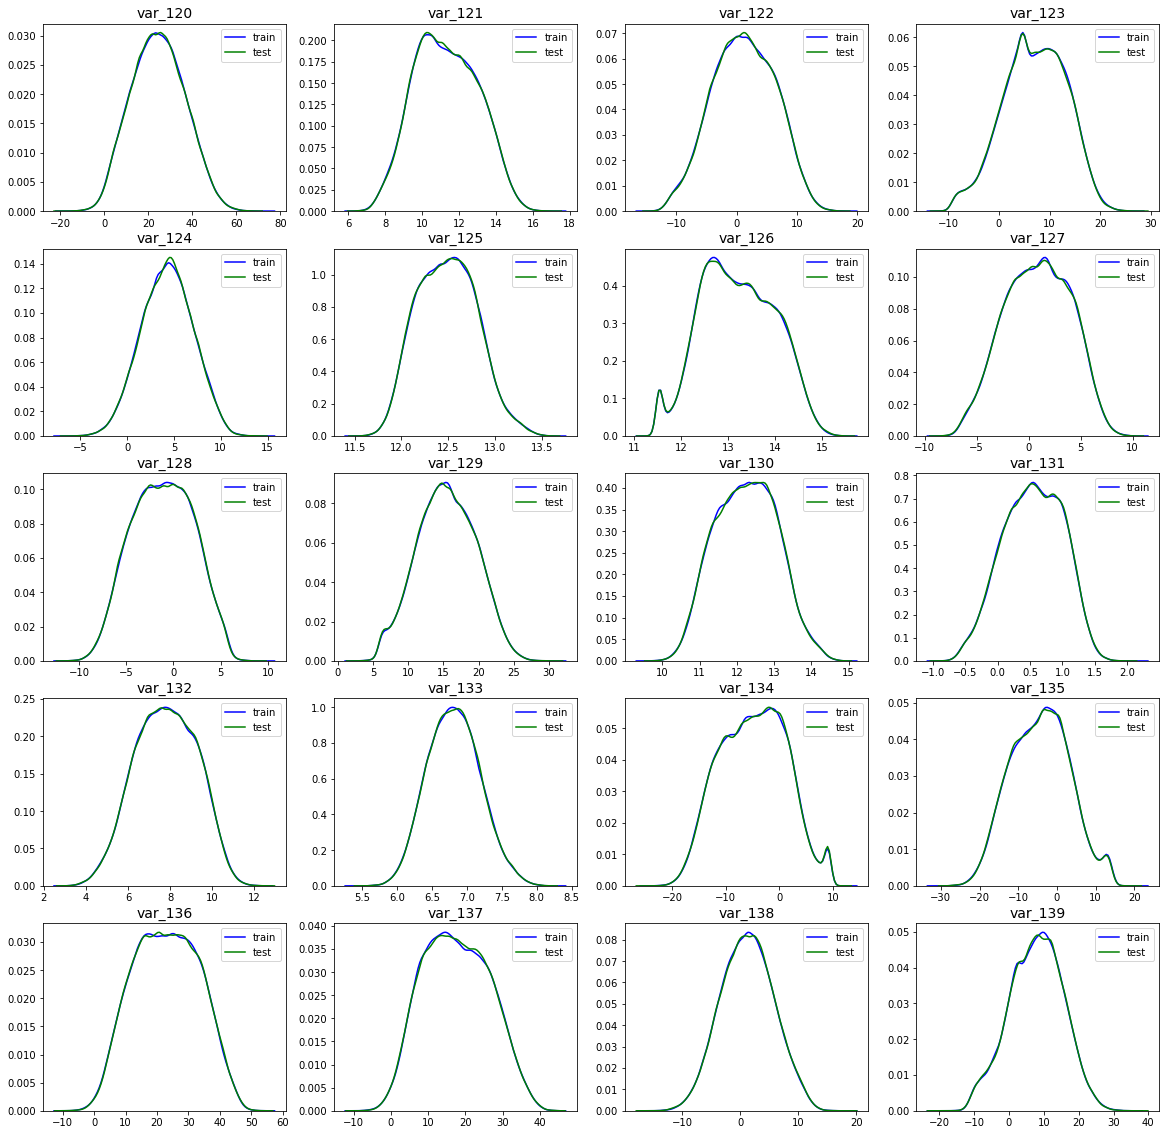

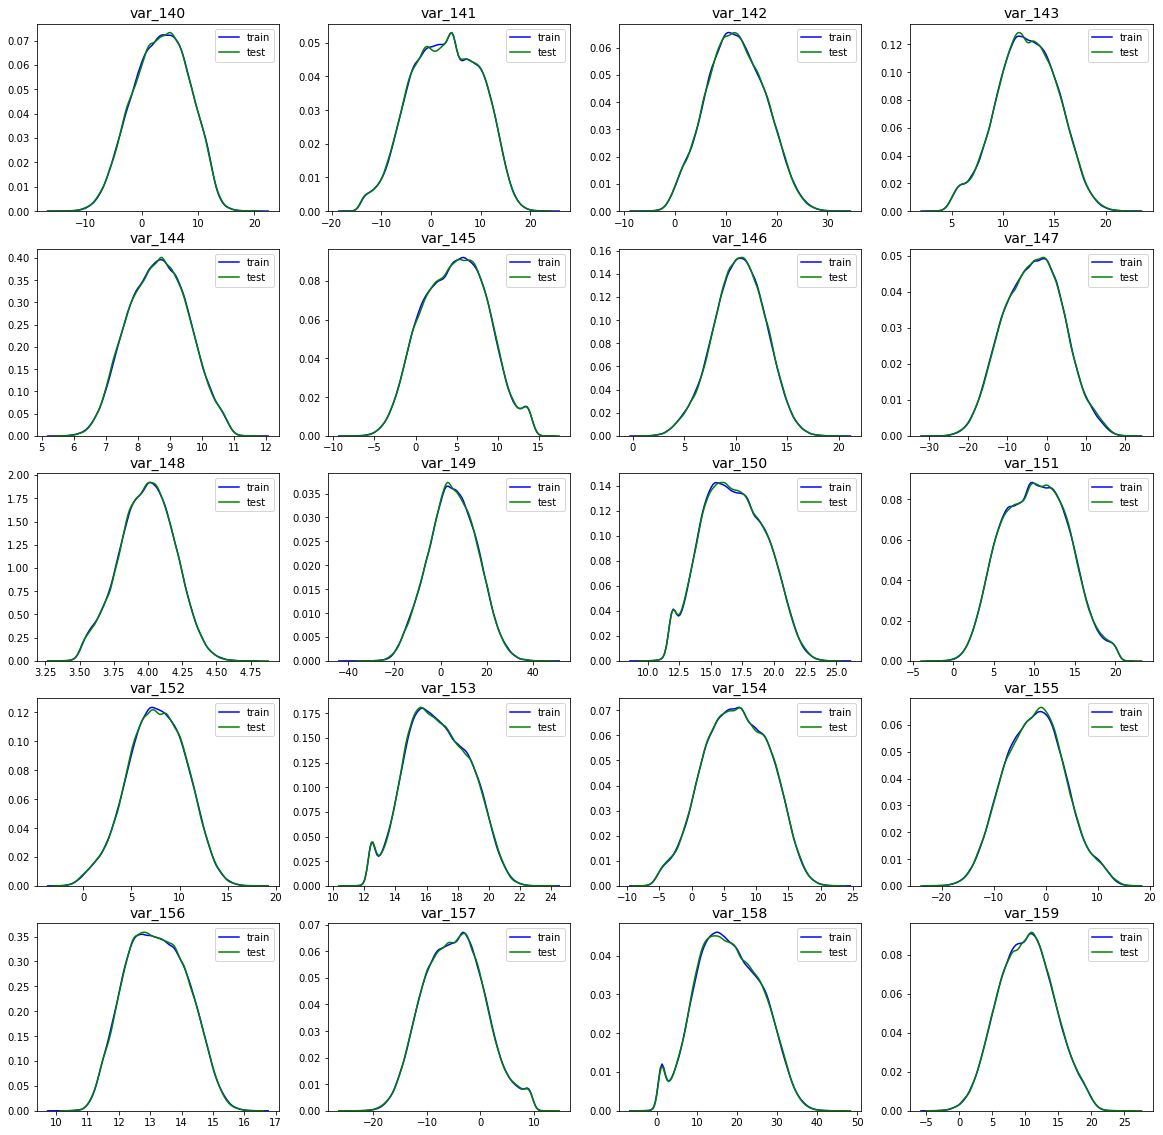

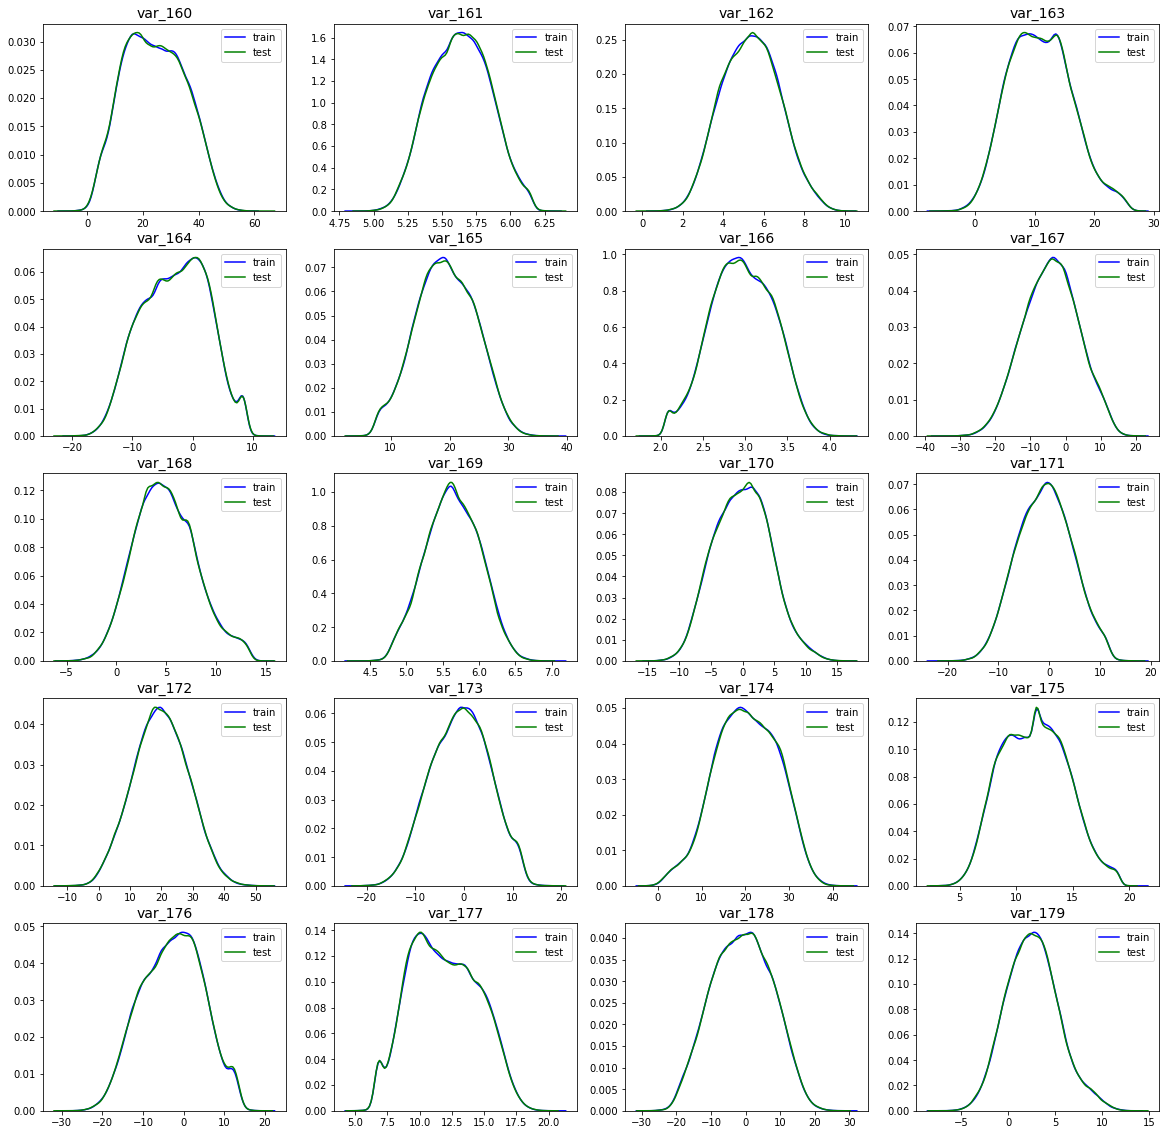

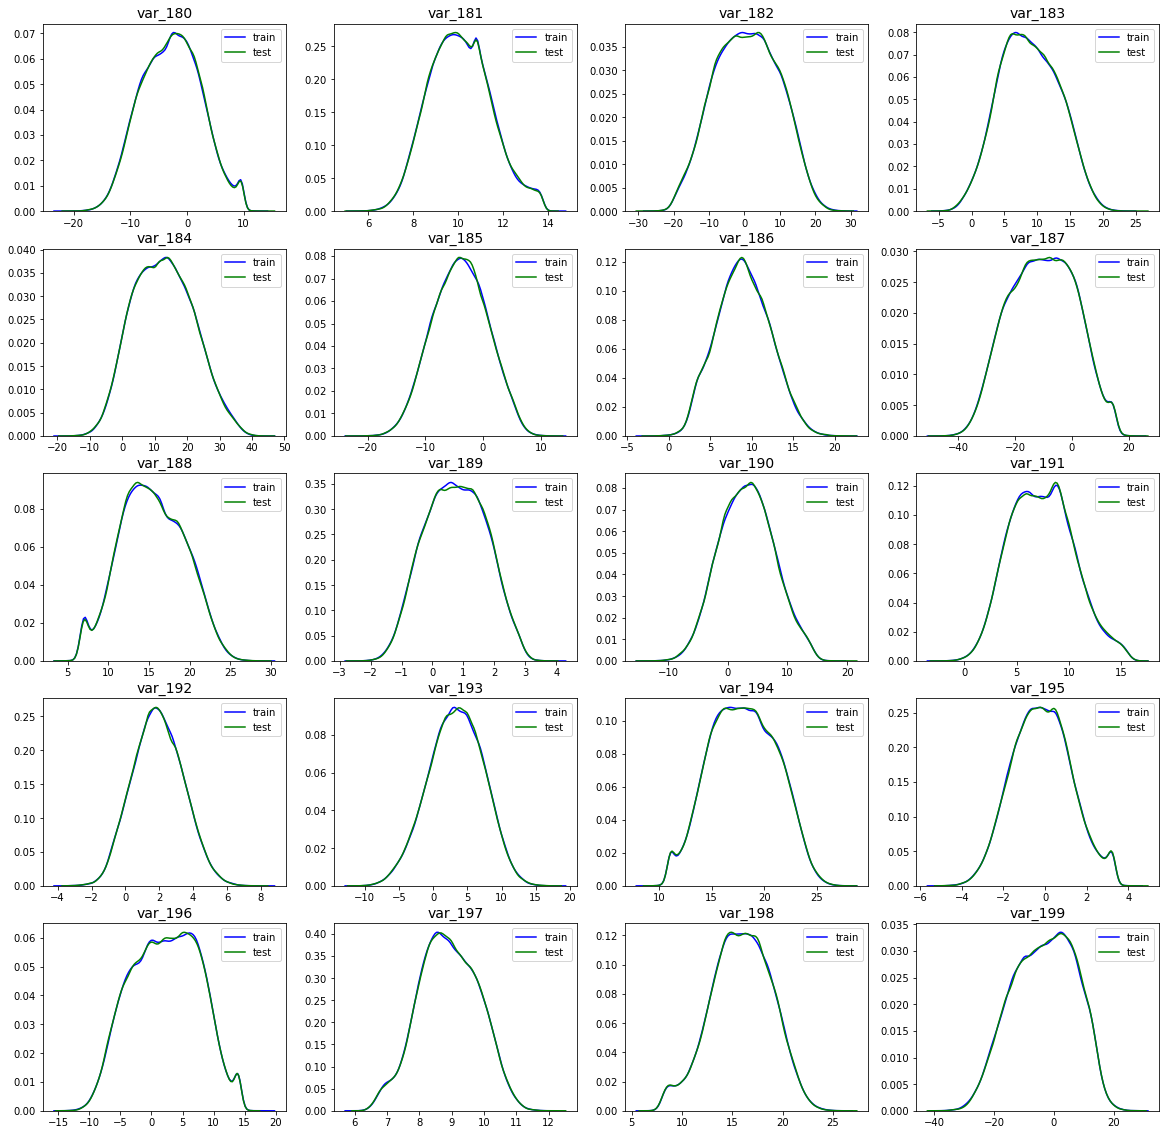

In [26]:
for i in range(10):
    group = CONTINUOUS_FEATURE_NAMES[i * 20 : (i + 1) * 20]
    plot_train_test_distributions(group)

__Выводы:__ 
* Распрделение большей части признаков обучающей выборки отличается при разных значениях целевой переменной. Хорошо должна сработать трасформация WOE (Weight of Evidence)
* Распределение признаков обучающей и тестовой выборки при визуальном анализе кажется более-менее похожим. 
* У большинства признаков распределение далеко от нормального - видна ассимметрия,  часто встречается распределение, более сглаженное по сравнению с нормальным.

### Задание 4.
* Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

### 1. Распределение основных статистик признаков в разрезе целевой переменной 

#### Среднее

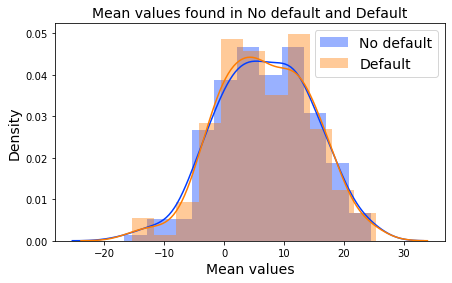

In [27]:
var_target_0 = train.loc[train[TARGET_NAME] == 0, NUMERICAL_FEATURE_NAMES].mean().values.flatten()
var_target_1 = train.loc[train[TARGET_NAME] == 1, NUMERICAL_FEATURE_NAMES].mean().values.flatten() 

plt.figure(figsize=(7, 4))
sns.set_palette("bright")
sns.distplot(var_target_0, label='No default')
sns.distplot(var_target_1, label='Default')

plt.xlabel('Mean values', size=14)
plt.title('Mean values found in No default and Default', size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)
plt.show()

#### Стандартное отклонение

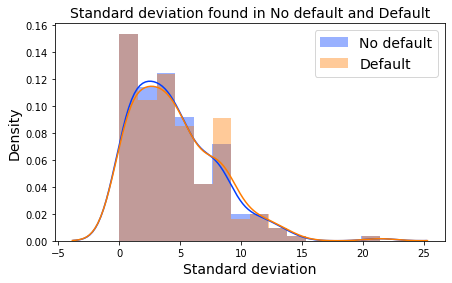

In [28]:
var_target_0 = train.loc[train[TARGET_NAME] == 0, NUMERICAL_FEATURE_NAMES].std().values.flatten()
var_target_1 = train.loc[train[TARGET_NAME] == 1, NUMERICAL_FEATURE_NAMES].std().values.flatten() 

plt.figure(figsize=(7, 4))
sns.distplot(var_target_0, label='No default')
sns.distplot(var_target_1, label='Default')

plt.xlabel('Standard deviation', size=14)
plt.title('Standard deviation found in No default and Default', size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)
plt.show()

### 2. Распределение основных статистик обучающей и тестовой выборки

#### Среднее

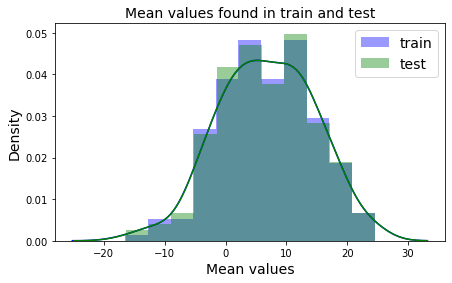

In [29]:
train_mean = train[NUMERICAL_FEATURE_NAMES].mean().values.flatten()
test_mean = test[NUMERICAL_FEATURE_NAMES].mean().values.flatten()

plt.figure(figsize=(7, 4))
sns.distplot(train_mean, color="Blue", label="train")
sns.distplot(test_mean, color="Green", label="test")

plt.xlabel('Mean values', size=14)
plt.title('Mean values found in train and test', size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)
plt.show()

#### Стандартное отклонение

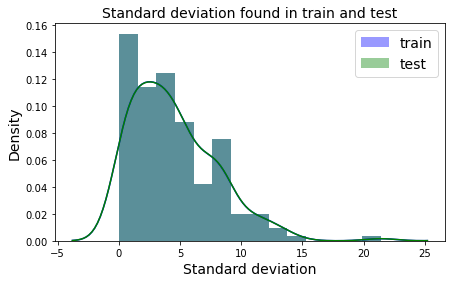

In [30]:
train_std = train[NUMERICAL_FEATURE_NAMES].std().values.flatten()
test_std = test[NUMERICAL_FEATURE_NAMES].std().values.flatten()

plt.figure(figsize=(7, 4))
sns.distplot(train_std, color="Blue", label="train")
sns.distplot(test_std, color="Green", label="test")

plt.xlabel('Standard deviation', size=14)
plt.title('Standard deviation found in train and test', size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)
plt.show()

__Выводы:__ 
* Распределение среднего значения признаков и стандартного отклонения отличается при рзаных значениях целевой переменной.
* Распределение основных статистик обучающей и тестовой выборки при визуальном анализе более-менее совпадают.

### Задание 5.
* Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

### Распределение коэффициентов корреляции между признаками

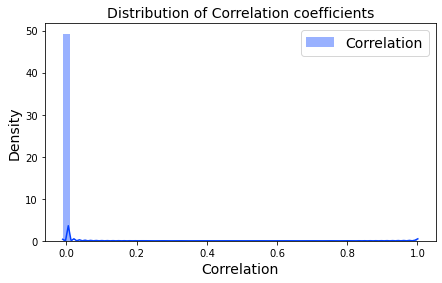

In [31]:
corr = train[NUMERICAL_FEATURE_NAMES].corr()

plt.figure(figsize=(7, 4))

sns.distplot(corr, label='Correlation')

plt.xlabel('Correlation', size=14)
plt.title('Distribution of Correlation coefficients', size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)
plt.show()

In [32]:
corr[corr < 0.2] = 0
(corr.sum(axis=0) - 1).sum()

0.0

__Вывод:__ линейной зависимости между признаками нет.

### Задание 6.
* Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

### Нелинейная связь между признаками и с целевой переменной.

In [33]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestRegressor(**parameters)
forest.fit(train[NUMERICAL_FEATURE_NAMES], train[TARGET_NAME])

Wall time: 6min 16s


RandomForestRegressor(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

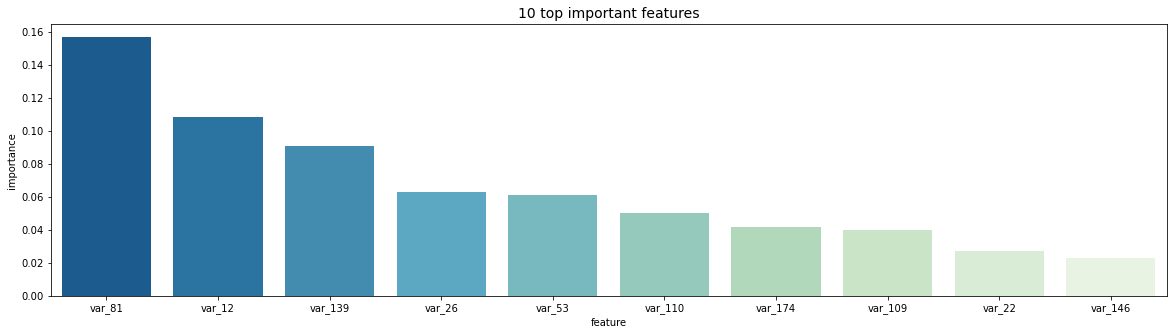

In [34]:
importance = pd.DataFrame({
    "feature": NUMERICAL_FEATURE_NAMES,
    "importance": forest.feature_importances_
})
importance = importance.sort_values(by="importance", ascending=False)
importance_info = importance.head(10)

plt.figure(figsize=(20, 5))
sns.barplot(x=importance_info["feature"], y=importance_info["importance"], palette="GnBu_r")
plt.title('10 top important features', size=14)
plt.show()

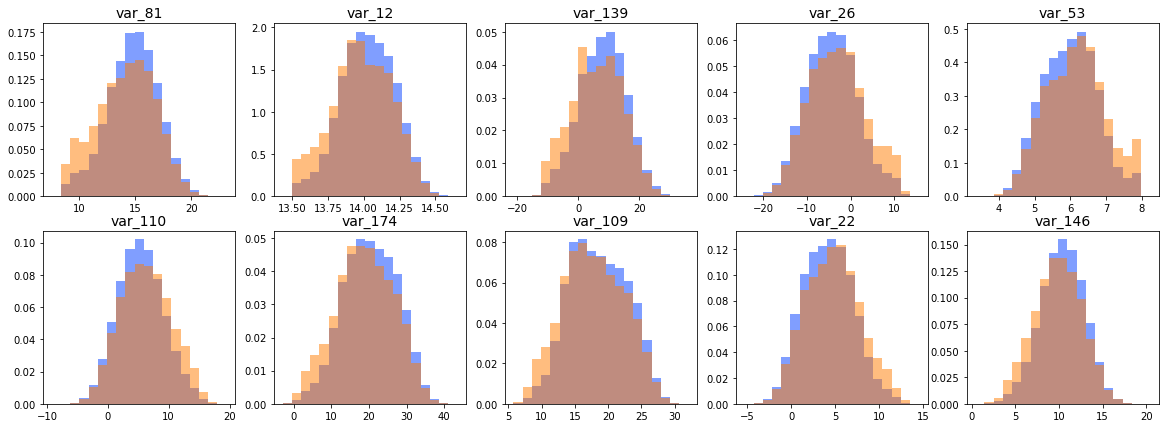

In [35]:
group = importance_info["feature"].to_list()
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
for num, var_name in enumerate(group):    
    var_target_0 = train.loc[train[TARGET_NAME] == 0, var_name]
    var_target_1 = train.loc[train[TARGET_NAME] == 1, var_name]    

    t1 = min(train[var_name])
    t2 = max(train[var_name])

    bins = np.linspace(t1, t2, 20)
    axes[num//5, num%5].hist(var_target_0, bins, density=True, alpha=0.5, label='No default')
    axes[num//5, num%5].hist(var_target_1, bins, density=True, alpha=0.5, label='Default')
    axes[num//5, num%5].set_title(var_name, fontsize=14)
plt.show()

In [36]:
importance.index = range(len(importance))
importance.loc[:20, :]

,feature,importance
0,var_81,0.156768
1,var_12,0.108119
2,var_139,0.090967
3,var_26,0.062670
4,var_53,0.061261
5,var_110,0.049987
6,var_174,0.041970
7,var_109,0.040030
8,var_22,0.026972
9,var_146,0.022732


Из 20 наиболее значимых признаков выбросы содержатся в следующих:

In [37]:
set(importance.loc[:20, :].feature) & (set(features_with_outliers))

{'var_110', 'var_139', 'var_146', 'var_148', 'var_165', 'var_179', 'var_190'}

### Задание 7
* Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

### Анализ распределения на обучении и тесте


### Kolmogorov-Smirnov Test

In [38]:
var_names = []
for num, feature in enumerate(NUMERICAL_FEATURE_NAMES):
    score = []
    for _ in range(30):
        statistic, pvalue = ks_2samp(
            train[feature].sample(500), test[feature].sample(500)
        )
        score.append(pvalue)
    pvalue = np.array(pvalue).mean()
    if pvalue < 0.05:               
        print(f'{feature}, распределение не идентично: pvalue={round(pvalue,3)}')
        var_names.append(feature)

var_7, распределение не идентично: pvalue=0.042
var_52, распределение не идентично: pvalue=0.024
var_100, распределение не идентично: pvalue=0.02
var_123, распределение не идентично: pvalue=0.035
var_159, распределение не идентично: pvalue=0.006
var_161, распределение не идентично: pvalue=0.016
var_196, распределение не идентично: pvalue=0.009


In [39]:
n = 20
red_list = list(set(var_names) & set(importance.loc[:n, 'feature']))
print(f'Из {n} признаков, имеющих наиболее тесную связь с целевой переменной, тест Колмогорова-Смирнова не прошли:\n',
      *red_list) 

Из 20 признаков, имеющих наиболее тесную связь с целевой переменной, тест Колмогорова-Смирнова не прошли:



Все 20 признаков, имеющих наиболее тесную связь с целевой переменной, прошли тест Колмогорова-Смирнова.

### Adversarial Validation

In [40]:
X_adv = pd.concat([
    train[NUMERICAL_FEATURE_NAMES], test[NUMERICAL_FEATURE_NAMES]
])
y_adv = np.hstack(
    (np.ones(train.shape[0]), np.zeros(test.shape[0])))

X_adv = X_adv.reset_index(drop=True)

In [41]:
%%time
parameters = {"max_depth": 4, "n_estimators": 50, "random_state": 27, "n_jobs": 2}
model = xgb.XGBClassifier(**parameters)
model.fit(X_adv, y_adv)

Wall time: 6min 15s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=2, num_parallel_tree=1, random_state=27,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

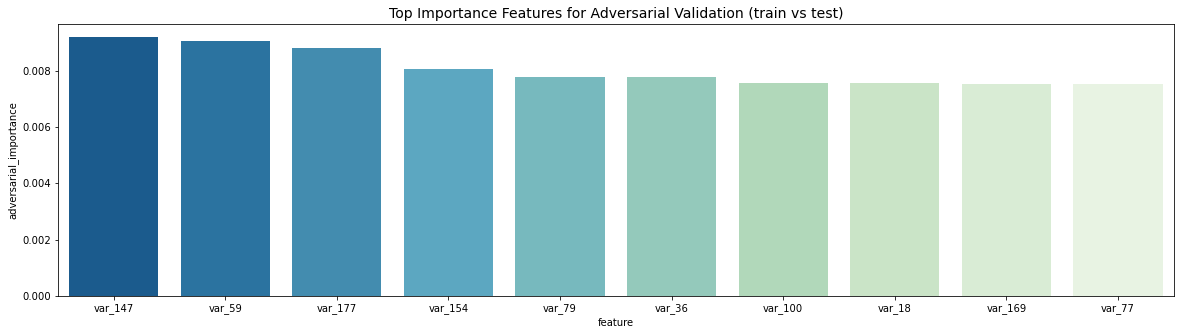

In [42]:
importance = pd.DataFrame({
    "feature": X_adv.columns,
    "adversarial_importance": model.feature_importances_
})
adv_importance = importance.sort_values(by="adversarial_importance", ascending=False)
importance_info = adv_importance.head(n=10)

plt.figure(figsize=(20, 5))
sns.barplot(x=importance_info["feature"], y=importance_info["adversarial_importance"], palette="GnBu_r")
plt.title("Top Importance Features for Adversarial Validation (train vs test)", size=14)
plt.show()

In [43]:
adv_importance.index = range(len(adv_importance))
adv_importance.loc[:20, :]

,feature,adversarial_importance
0,var_147,0.009198
1,var_59,0.009040
2,var_177,0.008806
3,var_154,0.008073
4,var_79,0.007791
5,var_36,0.007766
6,var_100,0.007574
7,var_18,0.007569
8,var_169,0.007544
9,var_77,0.007518


Из 20 признаков, имеющих наиболее тесную связь с целевой переменной, не прошли тест Колмогорова-Смирнова либо попали в top 20 при adversarial validation:

In [44]:
n = 20
red_list = (set(adv_importance.loc[:n, 'feature']) | set(var_names)) & set(importance.loc[:n, 'feature'])
red_list

{'var_18', 'var_5', 'var_7', 'var_8'}

### Population Stability Index

https://wiki.loginom.ru/articles/stability-index.html

In [45]:
class PSI(BaseEstimator, TransformerMixin):
    """
    Вычисление PSI и отбор признаков на их основе.

    Parameters
    ----------
    threshold: float
        Порог для отбора переменных по PSI.
        Если PSI для переменной выше порога - переменная макрируется
        0 (не использовать для дальнейшего анализа), если ниже
        порога - маркируется 1 (использовать для дальнейшего анализа).

    categorical_features: List[str], optional, default = None
        Список категориальных признаков для анализа.
        Опциональный параметр, по умолчанию, не используется, т.е.
        категориальные признаки отсутствуют.

    n_bins: int, optional, default = 20
        Количество бинов, на которые разбивается выборка.

    min_value: float, optional, default = 0.005
        Значение которое используется, если рассчитанный psi = 0.

    bin_type: string, optional, default = "quanitles"
        Способ разбиения на бины: "quantiles" or "bins".
        При выборе "quantiles" - выборка будет разбита на n_bins
        квантилей, при выборке "bins" - выборка будет разбита на
        n_bins бакетов с равным шагом между бакетами.
        Иные значения приводят к возникновению ValueError.

    Attributes
    ----------
    scores_: Dict[str, float]
        Словарь со значениями PSI,
        ключ словаря - название признака, значение - PSI-score.

    """
    def __init__(self,
                 threshold: float,
                 categorical_features: Optional[List[str]] = None,
                 bin_type: str = "quantiles",
                 min_value: float = 0.005,
                 n_bins: int = 20):

        self.threshold = threshold
        self.categorical_features = categorical_features
        self.min_value = min_value
        self.n_bins = n_bins
        if bin_type in ["quantiles", "bins"]:
            self.bin_type = bin_type
        else:
            raise ValueError(
                "Incorrect bin_type value. Expected 'quantiles' or 'bins', "
                f"but {bin_type} is transferred."
            )
        self.scores = {}

    def calculate_bins(self, data: pd.Series) -> np.array:
        """
        Вычисление границ бинов для разбиения выборки.

        Parameters
        ----------
        data: pandas.Series, shape = [n_samples, ]
            наблюдения из train-выборки.

        Returns
        -------
        bins: numpy.array, shape = [self.n_bins + 1]
            Список с границами бинов.

        """
        if self.bin_type == "quantiles":
            bins = np.linspace(0, 100, self.n_bins + 1)
            bins = [np.nanpercentile(data, x) for x in bins]

        else:
            bins = np.linspace(data.min(), data.max(), self.n_bins + 1)

        return np.unique(bins)

    def calculate_psi_in_bin(self, expected_score, actual_score) -> float:
        """
        Вычисление значения psi для одного бакета.

        Осуществляется проверка на равенство нулю expected_score и
        actual_score: если один из аргументов равен нулю, то его
        значение заменяется на self.min_value.

        Parameters
        ----------
        expected_score: float
            Ожидаемое значение.

        actual_score: float
            Наблюдаемое значение.

        Returns
        -------
        value: float
            Значение psi в бине.

        """
        if expected_score == 0:
            expected_score = self.min_value
        if actual_score == 0:
            actual_score = self.min_value

        value = (expected_score - actual_score)
        value = value * np.log(expected_score / actual_score)

        return value

    def calculate_psi(self, expected: pd.Series, actual: pd.Series, bins) -> float:
        """
        Расчет PSI для одной переменной.

        Parameters
        ----------
        expected: pandas.Series, shape = [n_samples_e, ]
            Наблюдения из train-выборки.

        actual: pandas.Series, shape = [n_samples_o, ]
            Наблюдения из test-выборки.

        bins: pandas.Series, shape = [self.n_bins, ]
            Бины для расчета PSI.

        Returns
        -------
        psi_score: float
            PSI-значение для данной пары выборок.

        """
        expected_score = np.histogram(expected.fillna(-9999), bins)[0]
        expected_score = expected_score / expected.shape[0]

        actual_score = np.histogram(actual.fillna(-9999), bins)[0]
        actual_score = actual_score / actual.shape[0]

        psi_score = np.sum(
            self.calculate_psi_in_bin(exp_score, act_score)
            for exp_score, act_score in zip(expected_score, actual_score)
        )

        return psi_score

    def calculate_numeric_psi(self, expected: pd.Series, actual: pd.Series) -> float:
        """
        Вычисление PSI для числовой переменной.

        Parameters
        ----------
        expected: pandas.Series, shape = [n_samples_e, ]
            Наблюдения из train-выборки.

        actual: pandas.Series, shape = [n_samples_o, ]
            Наблюдения из test-выборки.

        Returns
        -------
        psi_score: float
            PSI-значение для данной пары выборок.

        """
        bins = self.calculate_bins(expected)
        psi_score = self.calculate_psi(expected, actual, bins)
        return psi_score

    def calculate_categorical_psi(self, expected: pd.Series, actual: pd.Series) -> float:
        """
        Вычисление PSI для категориальной переменной.
        PSI рассчитывается для каждого уникального значения категории.

        Parameters
        ----------
        expected: pandas.Series, shape = [n_samples_e, ]
            Наблюдения из train-выборки.

        actual: pandas.Series, shape = [n_samples_o, ]
            Наблюдения из test-выборки.

        Returns
        -------
        psi_score: float
            PSI-значение для данной пары выборок.

        """
        bins = np.unique(expected).tolist()
        psi_score = self.calculate_psi(expected, actual, bins)
        return psi_score

    def fit(self, X, y=None):
        """
        Вычисление PSI-значения для всех признаков.

        Parameters
        ----------
        X: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для обучения.

        y: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для тестирования.

        Returns
        -------
        self
        """
        missed_columns = list(set(X.columns) - set(y.columns))

        if missed_columns:
            raise MissedColumnError(
                f"Missed {list(missed_columns)} columns in data.")

        if self.categorical_features:
            numeric_features = list(
                set(X.columns) - set(self.categorical_features)
            )
            for feature in self.categorical_features:
                self.scores[feature] = self.calculate_categorical_psi(
                    X[feature], y[feature]
                )
        else:
            numeric_features = X.columns

        for feature in tqdm(numeric_features):
            self.scores[feature] = self.calculate_numeric_psi(
                X[feature], y[feature]
            )
        return self

    def transform(self, X, y=None) -> pd.DataFrame:
        """
        Отбор переменных по self.threshold.
        Если PSI-score для переменной выше порога, то переменная
        помечается 0 (не использовать для дальнейшего анализа), если ниже
        порога - маркируется 1 (использовать для дальнейшего анализа).

        Parameters
        ----------
        data: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для обучения.

        target: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для тестирования.

        Returns
        -------
        scores: pandas.DataFrame, shape = [n_features, 3]
            Датафрейм с PSI-анализом переменных.

        """
        check_is_fitted(self, "scores")
        scores = pd.Series(self.scores)
        scores = pd.DataFrame({"Variable": scores.index, "PSI": scores.values})
        scores["Selected"] = np.where(scores.PSI < self.threshold, 1, 0)
        scores = scores.sort_values(by="PSI")

        mask = scores["Selected"] == 1
        self.used_features = scores.loc[mask, "Variable"].tolist()

        return scores.reset_index(drop=True)

In [46]:
features_to_score = NUMERICAL_FEATURE_NAMES
psi = PSI(threshold=0.01)

In [47]:
a = psi.fit_transform(
    X=train[features_to_score],
    y=test[features_to_score]
)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:20<00:00,  9.88it/s]


In [48]:
a[a.Selected == 1].Selected.sum()

200

Согласно Population Stability Index разлиие между обучающей и тестовой выборкой значимо - индекс каждого признака равен 1.